# 1. Define the problem and perform an Exploratory Data Analysis

### Problem Statements:

The Tourism company 'Visit with us' wants to enable and establish a viable business model to expand the customer base. 
We need to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector. One way to expand the customer base is to introduce offering of packages.
Currently,they offer 5 types of packages. Based of last year data, only 18% of customers purchased the packages.
Now,The Company planning to launch new packages called Wellness Tourism Package.

As a Data Scientist, we need to analyze the customer's data and information to provide recommendations to the Policy Maker 
and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced 
travel package.

### Objective:

To predict which customer is more likely to purchase the newly introduced travel package.

### 1.1 Import Libraries

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [2]:
# To read the Tourism.xlsx file having sheet name -Tourism into dataframe 
Tourism_df = pd.read_excel("Tourism.xlsx",sheet_name="Tourism")  
Tourism_df_copy = Tourism_df.copy() # To backup the file 

Tourism_df.head(10) 

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


### 1.2 Observations on Data

In [3]:
#Shape of the data (rows and columns)
print('There are :', Tourism_df.shape[0] ,'rows and', Tourism_df.shape[1], 'columns')

There are : 4888 rows and 20 columns


In [4]:
#To view dataframe details
Tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

1. The are 4888 rows and 20 columns. Some columns have some null values. 
2. The features are of datatype integer, float and objects.
3. There are some null values for features : Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar,
   NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome.  

In [5]:
# Some Features to be a casted as categorical variable
Tourism_df["ProdTaken"] = Tourism_df["ProdTaken"].astype("category")
Tourism_df["TypeofContact"] = Tourism_df["TypeofContact"].astype("category")
Tourism_df["CityTier"] = Tourism_df["CityTier"].astype("category")
Tourism_df["Occupation"] = Tourism_df["Occupation"].astype("category")
Tourism_df["Gender"] = Tourism_df["Gender"].astype("category")
Tourism_df["ProductPitched"] = Tourism_df["ProductPitched"].astype("category")
Tourism_df["PreferredPropertyStar"] = Tourism_df["PreferredPropertyStar"].astype("category")
Tourism_df["MaritalStatus"] = Tourism_df["MaritalStatus"].astype("category")
Tourism_df["Passport"] = Tourism_df["Passport"].astype("category")
Tourism_df["PitchSatisfactionScore"] = Tourism_df["PitchSatisfactionScore"].astype("category")
Tourism_df["OwnCar"] = Tourism_df["OwnCar"].astype("category")
Tourism_df["Designation"] = Tourism_df["Designation"].astype("category")

In [6]:
#To view dataframe details
Tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   category
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   int64   
 9   NumberOfFollowups         4843 non-null   float64 
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

The features with Categorical values are changed as category datatype.

### 1.3 Summary of the dataset.

In [7]:
Tourism_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.00,22347.0,25571.00,98678.0


1. Customer ID is an ID variable and not useful for predictive modelling.
2. The customers are between 18 and 61 (inclusive) ages and average age is 37 years
3. The duration of the pitch by a salesperson to the customer between 5 and 127. The average value is 15.
4. The Number Of Person Visiting is between 1 and 5. The average value is 3.
5. The Number Of Follow-ups is between 1 and 6. The average value is close to 4.
6. The Number of Trips is between 1 and 22. The average is 3.
7. The mimimum Number of Children visiting is zero(i.e none) and maximum is 3
8. The Monthly income is between 1000 and 98678. The average income is 23619.  

In [8]:
Tourism_df.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862,3,3,2993
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
PitchSatisfactionScore,4888,5,3,1478


* Product Taken is our target variable with 81% record with value 0 (i.e Packages not purchased).
* The majority of contact is done via. Self Enquiry which is 70% 
* The majority of City Tier is Tier 1 which is 65%
* The majority of Occupation is Salaried people which is 48%
* The majority of customers are Male which is 59%
* The majority of Product pitched by the salesperson is Package 'Basic' which is 37.6%
* The majority of Preferred Property star is 3 star which is 61%
* Most of the customers are Married which is around 48%
* Most of the customers doesn't have passport which is around 71%
* The majority of Pitch Satisfaction Score is 3 which is 30%
* The Most of the customers have their own Car which is 62%
* The Most of the customers are Executives which is 37.6%

In [9]:
Tourism_df.dtypes

CustomerID                     int64
ProdTaken                   category
Age                          float64
TypeofContact               category
CityTier                    category
DurationOfPitch              float64
Occupation                  category
Gender                      category
NumberOfPersonVisiting         int64
NumberOfFollowups            float64
ProductPitched              category
PreferredPropertyStar       category
MaritalStatus               category
NumberOfTrips                float64
Passport                    category
PitchSatisfactionScore      category
OwnCar                      category
NumberOfChildrenVisiting     float64
Designation                 category
MonthlyIncome                float64
dtype: object

**Let's look at the unqiue values of all the categories**

In [10]:
cols_cat= Tourism_df.select_dtypes(['category'])

In [11]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
************

* There are 155 customers with Gender mentioned as 'Fe Male'. 

In [12]:
#To check for the missing values
Tourism_df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

* No Age mentioned for 226 customers. This is a missing value as age cannot be spaces.So,We need to do Missing value treatment 
  for Age feature by replacing with Mean or Median. 
* There are 25 customers with no TypeofContacts. This is missing values and need to be treated. 
* There are 251 records with no duration of pitch. We will considers as zero values.
* No NumberOfFollowups for 45 customers. We can consider this as zero as there can be any follow ups also.
* No PreferredPropertyStar for 26 customers. We can consider as zero rating because Customer can also avoid giving any rating.
* No NumberOfTrips for 140 customers. We can consider as zero trips i.e no trips taken by the customers
* No NumberOfChildrenVisiting for 66 customers. We can consider as no children i.e zero
* No MonthlyIncome for 233 customers. This is a missing value because all our Customers have some occupation. So,We need to do 
  Missing value treatment for monthly income feature by replacing with Mean or Median. 

### 1.4 Univariate Analysis
Before we process data, lets take the graphical visualization of the data to understand better.

In [13]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

### Observation on Age 

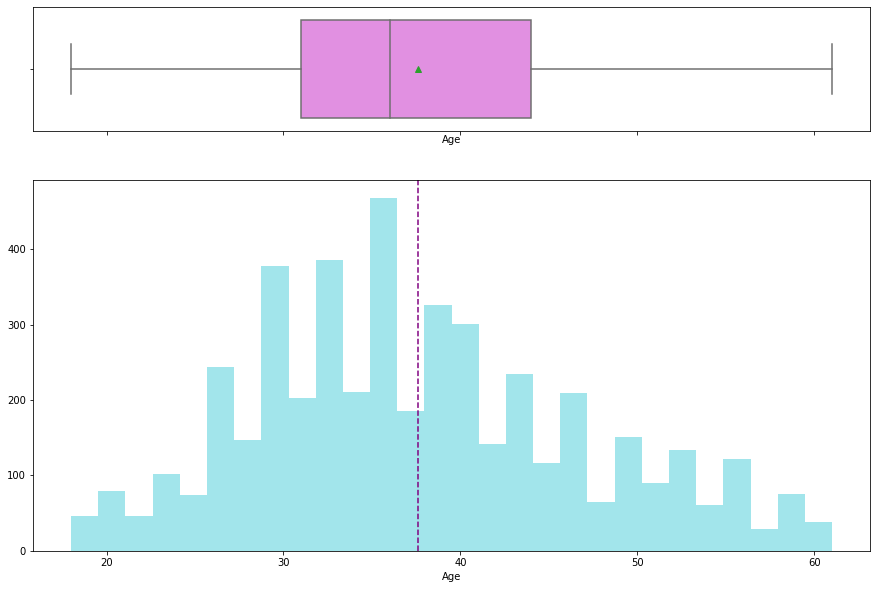

In [14]:
histogram_boxplot(Tourism_df["Age"])

- The distribution of age is fully distributed. We see a slight Positive skewness.
- The boxplot shows that there is no outliers.
- There are customers at all ages between 18 and 61. 
- We can see most of the customers are at age groups - mid 30's.
  

### Observation on Duration of Pitch 

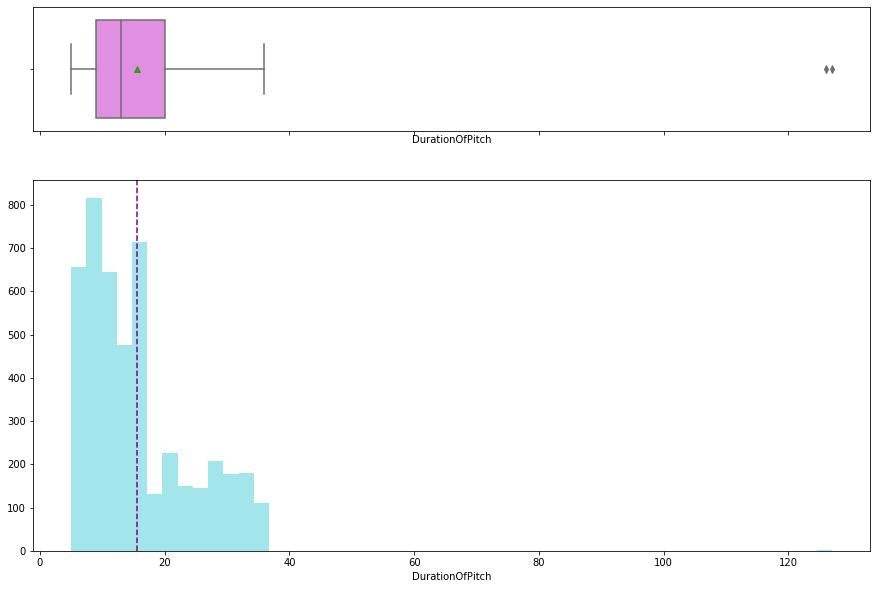

In [15]:
histogram_boxplot(Tourism_df["DurationOfPitch"])

- The distribution of duration of pitch shows a right skewness.
- The boxplot shows that there is some outliers outside the upper limit.
- The most of the duration of pitch is between 6 to 10.

### Observation on Number of Person visiting 

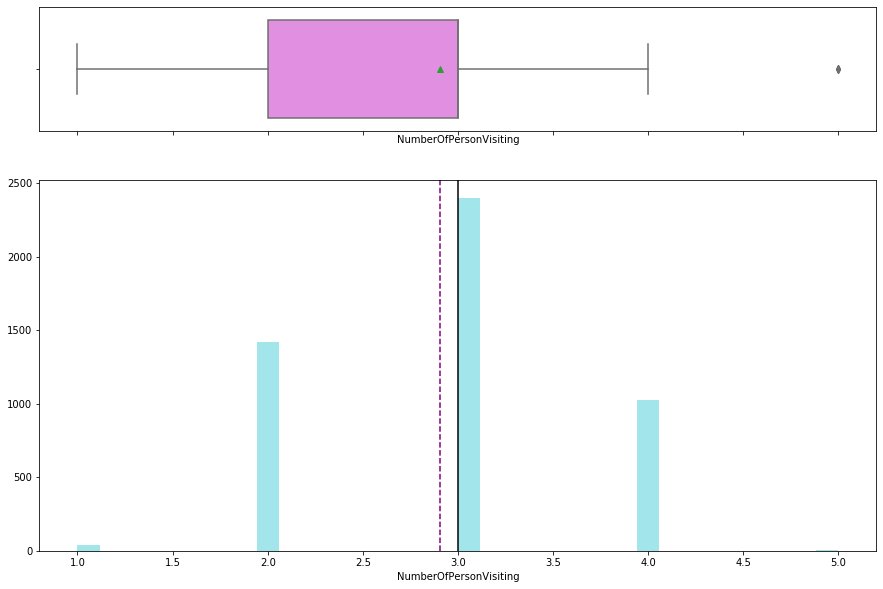

In [16]:
histogram_boxplot(Tourism_df["NumberOfPersonVisiting"])

- The distribution of number of person visiting shows a left skewness.
- The boxplot shows that there is some outliers outside the upper limit.
- The most number of person visiting is 3 members.

### Observation on Number of Followups 

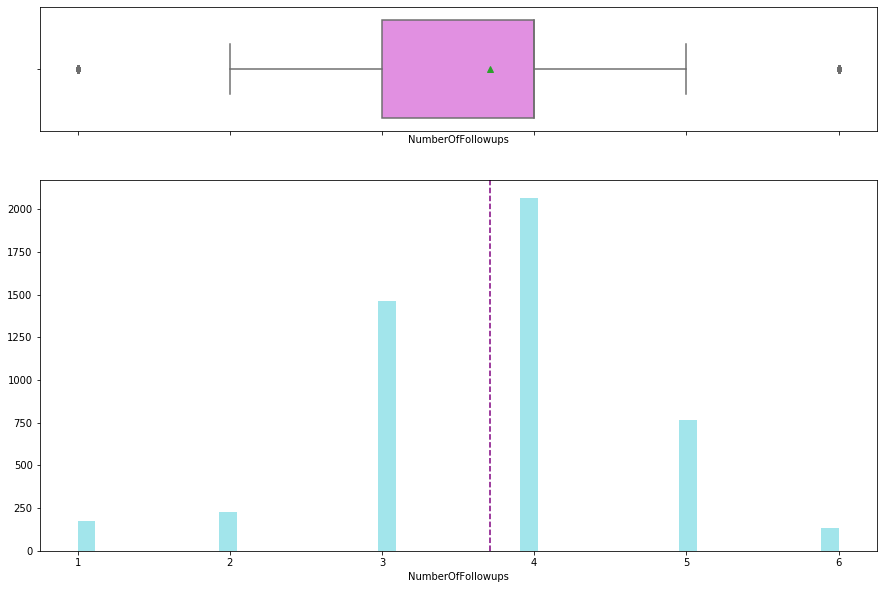

In [17]:
histogram_boxplot(Tourism_df["NumberOfFollowups"])

- The distribution of number of followups shows a left skewness.
- The boxplot shows that there is some outliers outside the lower and upper limits.
- The most of number of followups made is 4 times.

### Observation on Number of Trips 

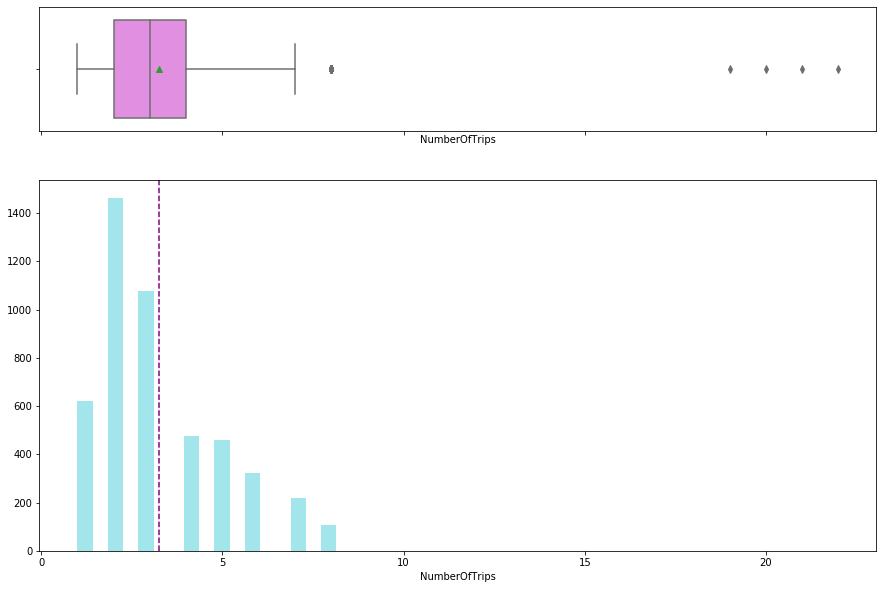

In [18]:
histogram_boxplot(Tourism_df["NumberOfTrips"])

- The distribution of number of trips shows a right skewness.
- The boxplot shows that there is some outliers outside the upper limits.
- The most number of trips is close to 2 trips.

### Observation on Number of Children visiting 

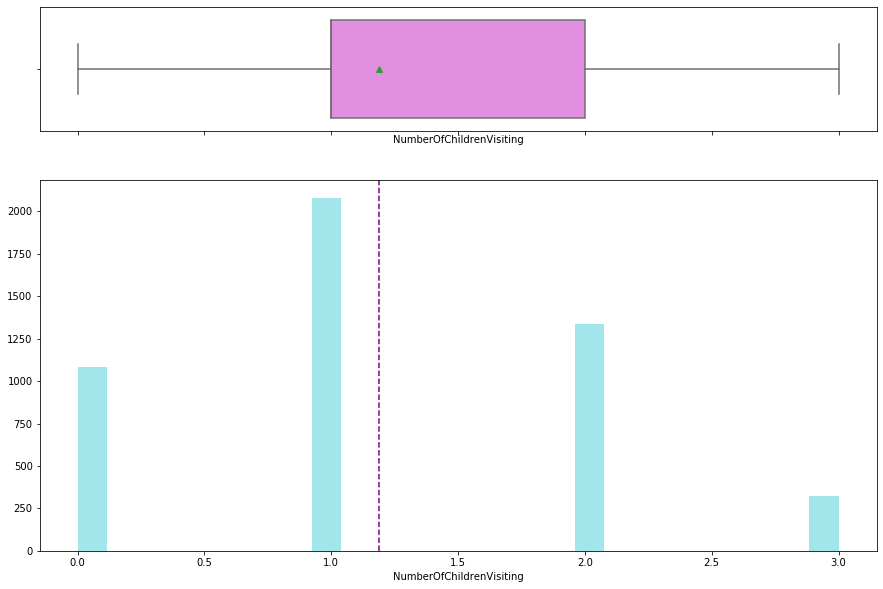

In [19]:
histogram_boxplot(Tourism_df["NumberOfChildrenVisiting"])

- The distribution of number of children visiting shows a right skewness.
- The boxplot shows that there is no outliers.
- The most number of children visiting is 1 child.

### Observation on Monthly Income 

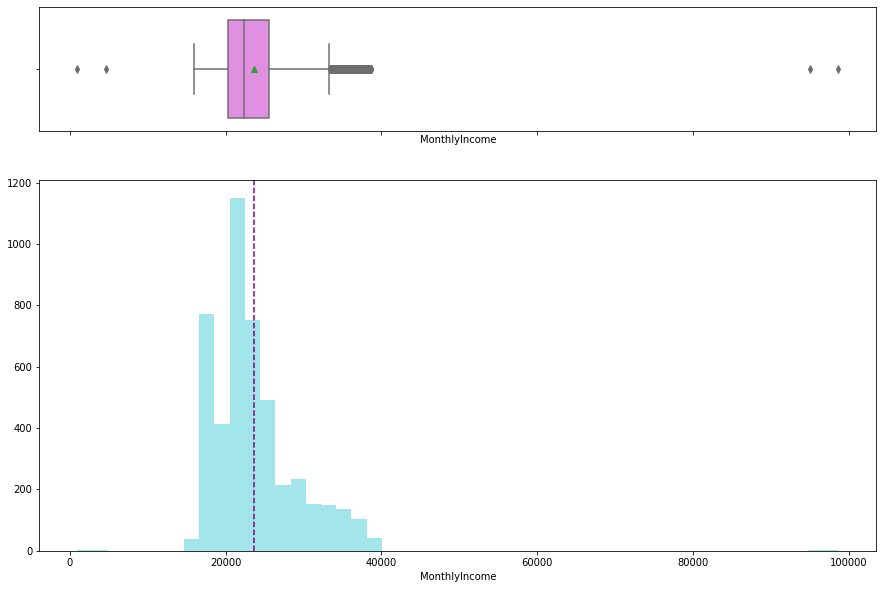

In [20]:
histogram_boxplot(Tourism_df["MonthlyIncome"])

- The distribution of Monthly income shows a right skewness.
- The boxplot shows that there is outliers outside the lower and upper limits.
- The most of Monthly income is between 20000 and 23000

In [21]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

### Observation on Product taken 

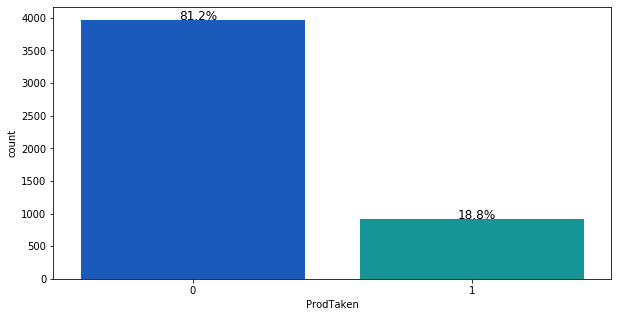

In [22]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Tourism_df["ProdTaken"], palette="winter")
perc_on_bar(ax, Tourism_df["ProdTaken"])

- 18.8% percentage of customers have purchased the travel package. 

### Observation on Type of Contact 

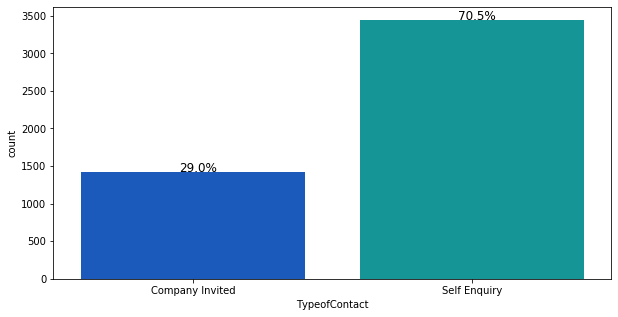

In [23]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Tourism_df["TypeofContact"], palette="winter")
perc_on_bar(ax, Tourism_df["TypeofContact"])

- 70.5% of customer did a Self Enquiry and 29% got invite from company.

### Observation on City Tier 

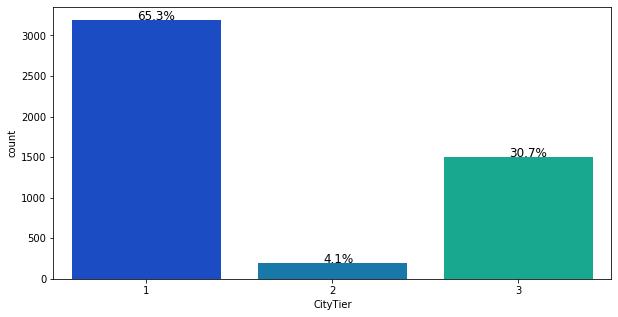

In [24]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Tourism_df["CityTier"], palette="winter")
perc_on_bar(ax, Tourism_df["CityTier"])

- Most of customers are from City Tier 1 with 65.3% and followed by City Tier 3 with 30.7%
- The least customers are from City Tier with 4.1%

### Observation on Occupation 

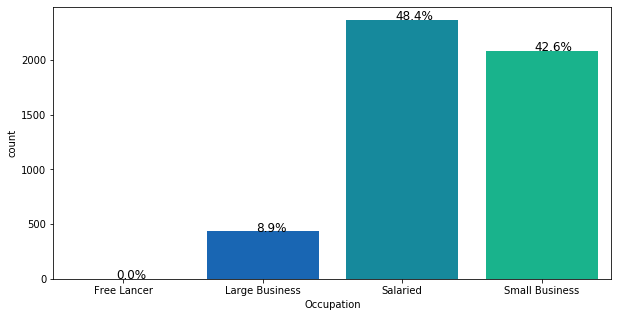

In [25]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Tourism_df["Occupation"], palette="winter")
perc_on_bar(ax, Tourism_df["Occupation"])

- Most of Customers are Salaried with 48.4% followed by small business with 42.6%
- Customer with large business is 8.9%
- Customer with Free Lancer is 0.0% (i.e very few customers who are free Lancers)

### Observation on Gender 

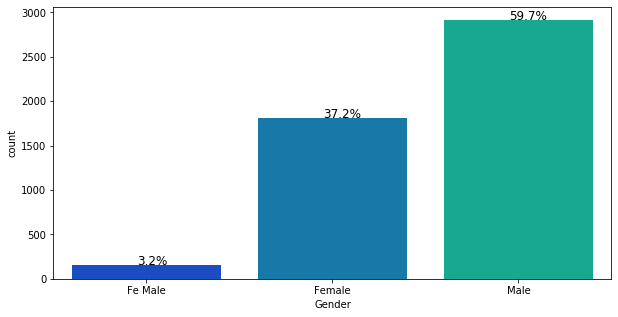

In [26]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Tourism_df["Gender"], palette="winter")
perc_on_bar(ax, Tourism_df["Gender"])

- Most of Customers are Male with 59.7% followed by Female with 37.2%
- There are some customers under 'Fe Male' with 3.2%. We cannot conclude them as female gender considering as Typo error. 
  All the Customers under 'Fe Male' are single or unmarried and they are in ages between 26 and 60. 

### Observation on Product Pitched 

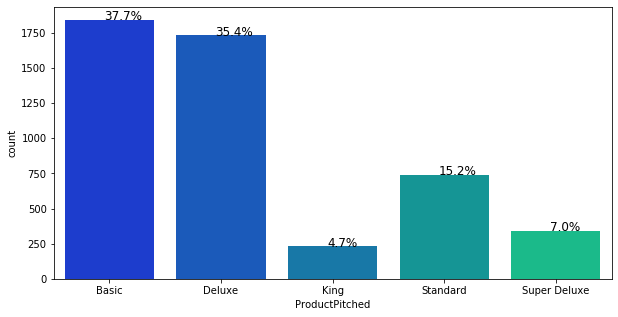

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Tourism_df["ProductPitched"], palette="winter")
perc_on_bar(ax, Tourism_df["ProductPitched"])

- The maximum product pitched is Basic (37.7%) and least is King (4.7%)

### Observation on Preferred Property Star

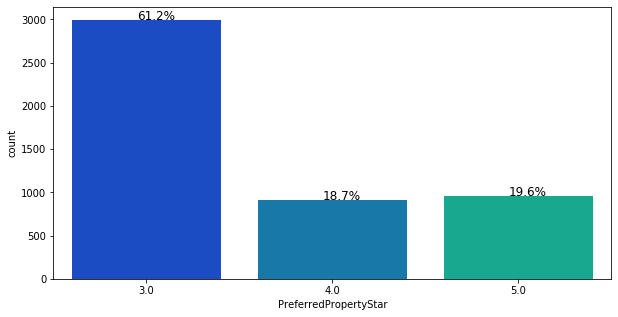

In [28]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Tourism_df["PreferredPropertyStar"], palette="winter")
perc_on_bar(ax, Tourism_df["PreferredPropertyStar"])

- The most preferred property star is 3 star with 61.2% 
- The least preferred property star is 4 star with 18.7%

### Observation on Marital status

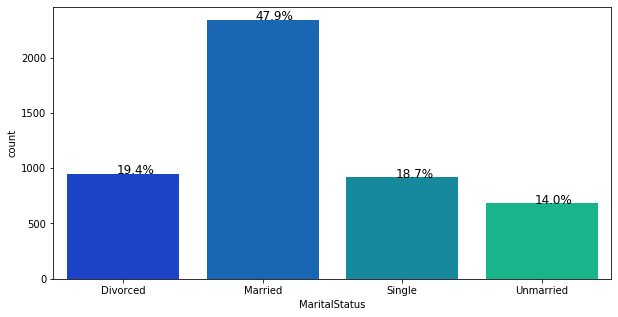

In [29]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Tourism_df["MaritalStatus"], palette="winter")
perc_on_bar(ax, Tourism_df["MaritalStatus"])

- The most of Customers are married with 47.9% followed by Divorced and Single.
- The least customer are Unmarried with 14%

### Observation on Passport

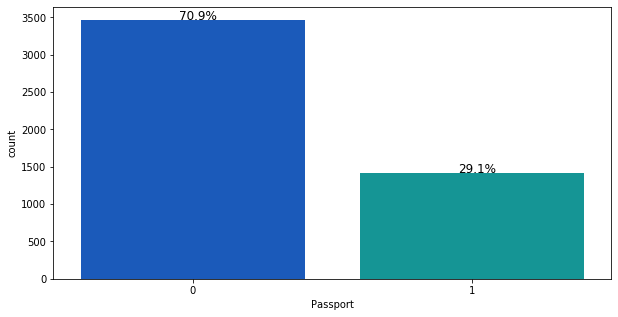

In [30]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Tourism_df["Passport"], palette="winter")
perc_on_bar(ax, Tourism_df["Passport"])

- The 71% of Customers are not having passport. 
- The 29% of Customers are having passport. 

### Observation on Pitch Satisfaction Score

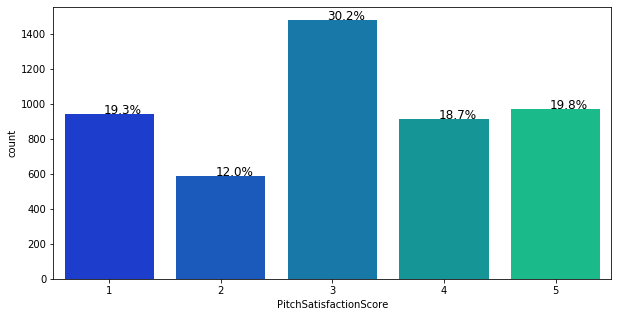

In [31]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Tourism_df["PitchSatisfactionScore"], palette="winter")
perc_on_bar(ax, Tourism_df["PitchSatisfactionScore"])

- The most of pitch satisfaction score is 3 and least is 2.

### Observation on OwnCar

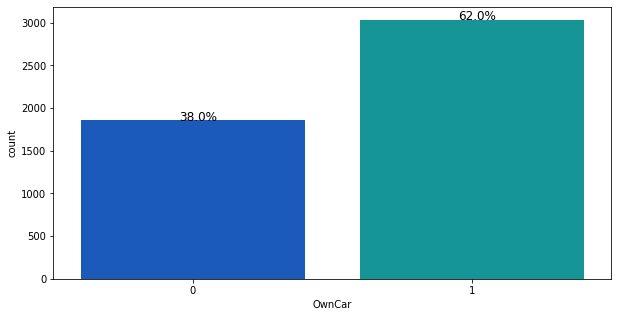

In [32]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Tourism_df["OwnCar"], palette="winter")
perc_on_bar(ax, Tourism_df["OwnCar"])

- 62% of Customers have own car.
- 38% of Customers don't have own car.

### Observation on Designation

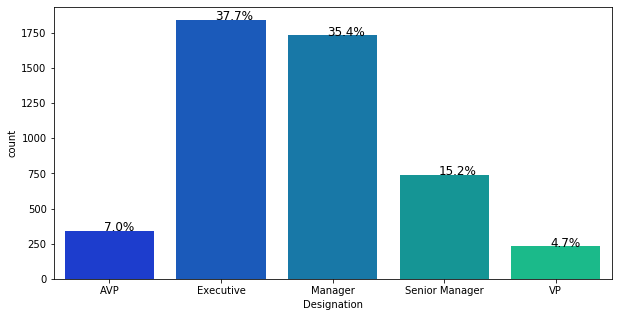

In [33]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(Tourism_df["Designation"], palette="winter")
perc_on_bar(ax, Tourism_df["Designation"])

- Most of customers are Executives and least are VP.  

### 1.5 Bivariate analysis 

Before we process data, lets take the graphical visualization of the data to understand better.

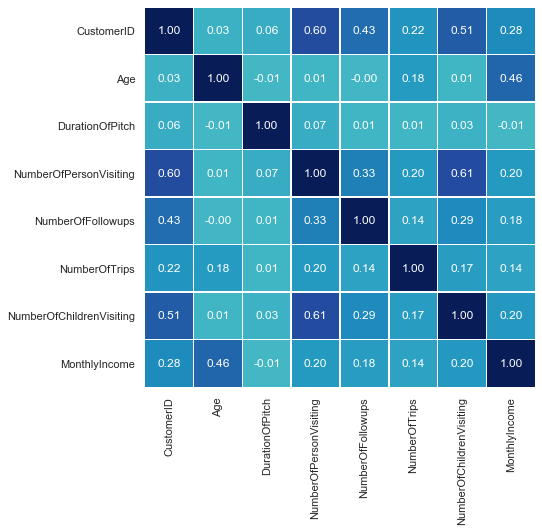

In [34]:
sns.set(rc={"figure.figsize": (7, 7)})
sns.heatmap(
    Tourism_df.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

***Observations***

- Age and Monthly income are slightly positively correlated (0.46)
- Number of person visiting and followups are slightly positively correlated(0.33)
- Number of Children visiting and Number of person visiting are positively correlated(0.61) 


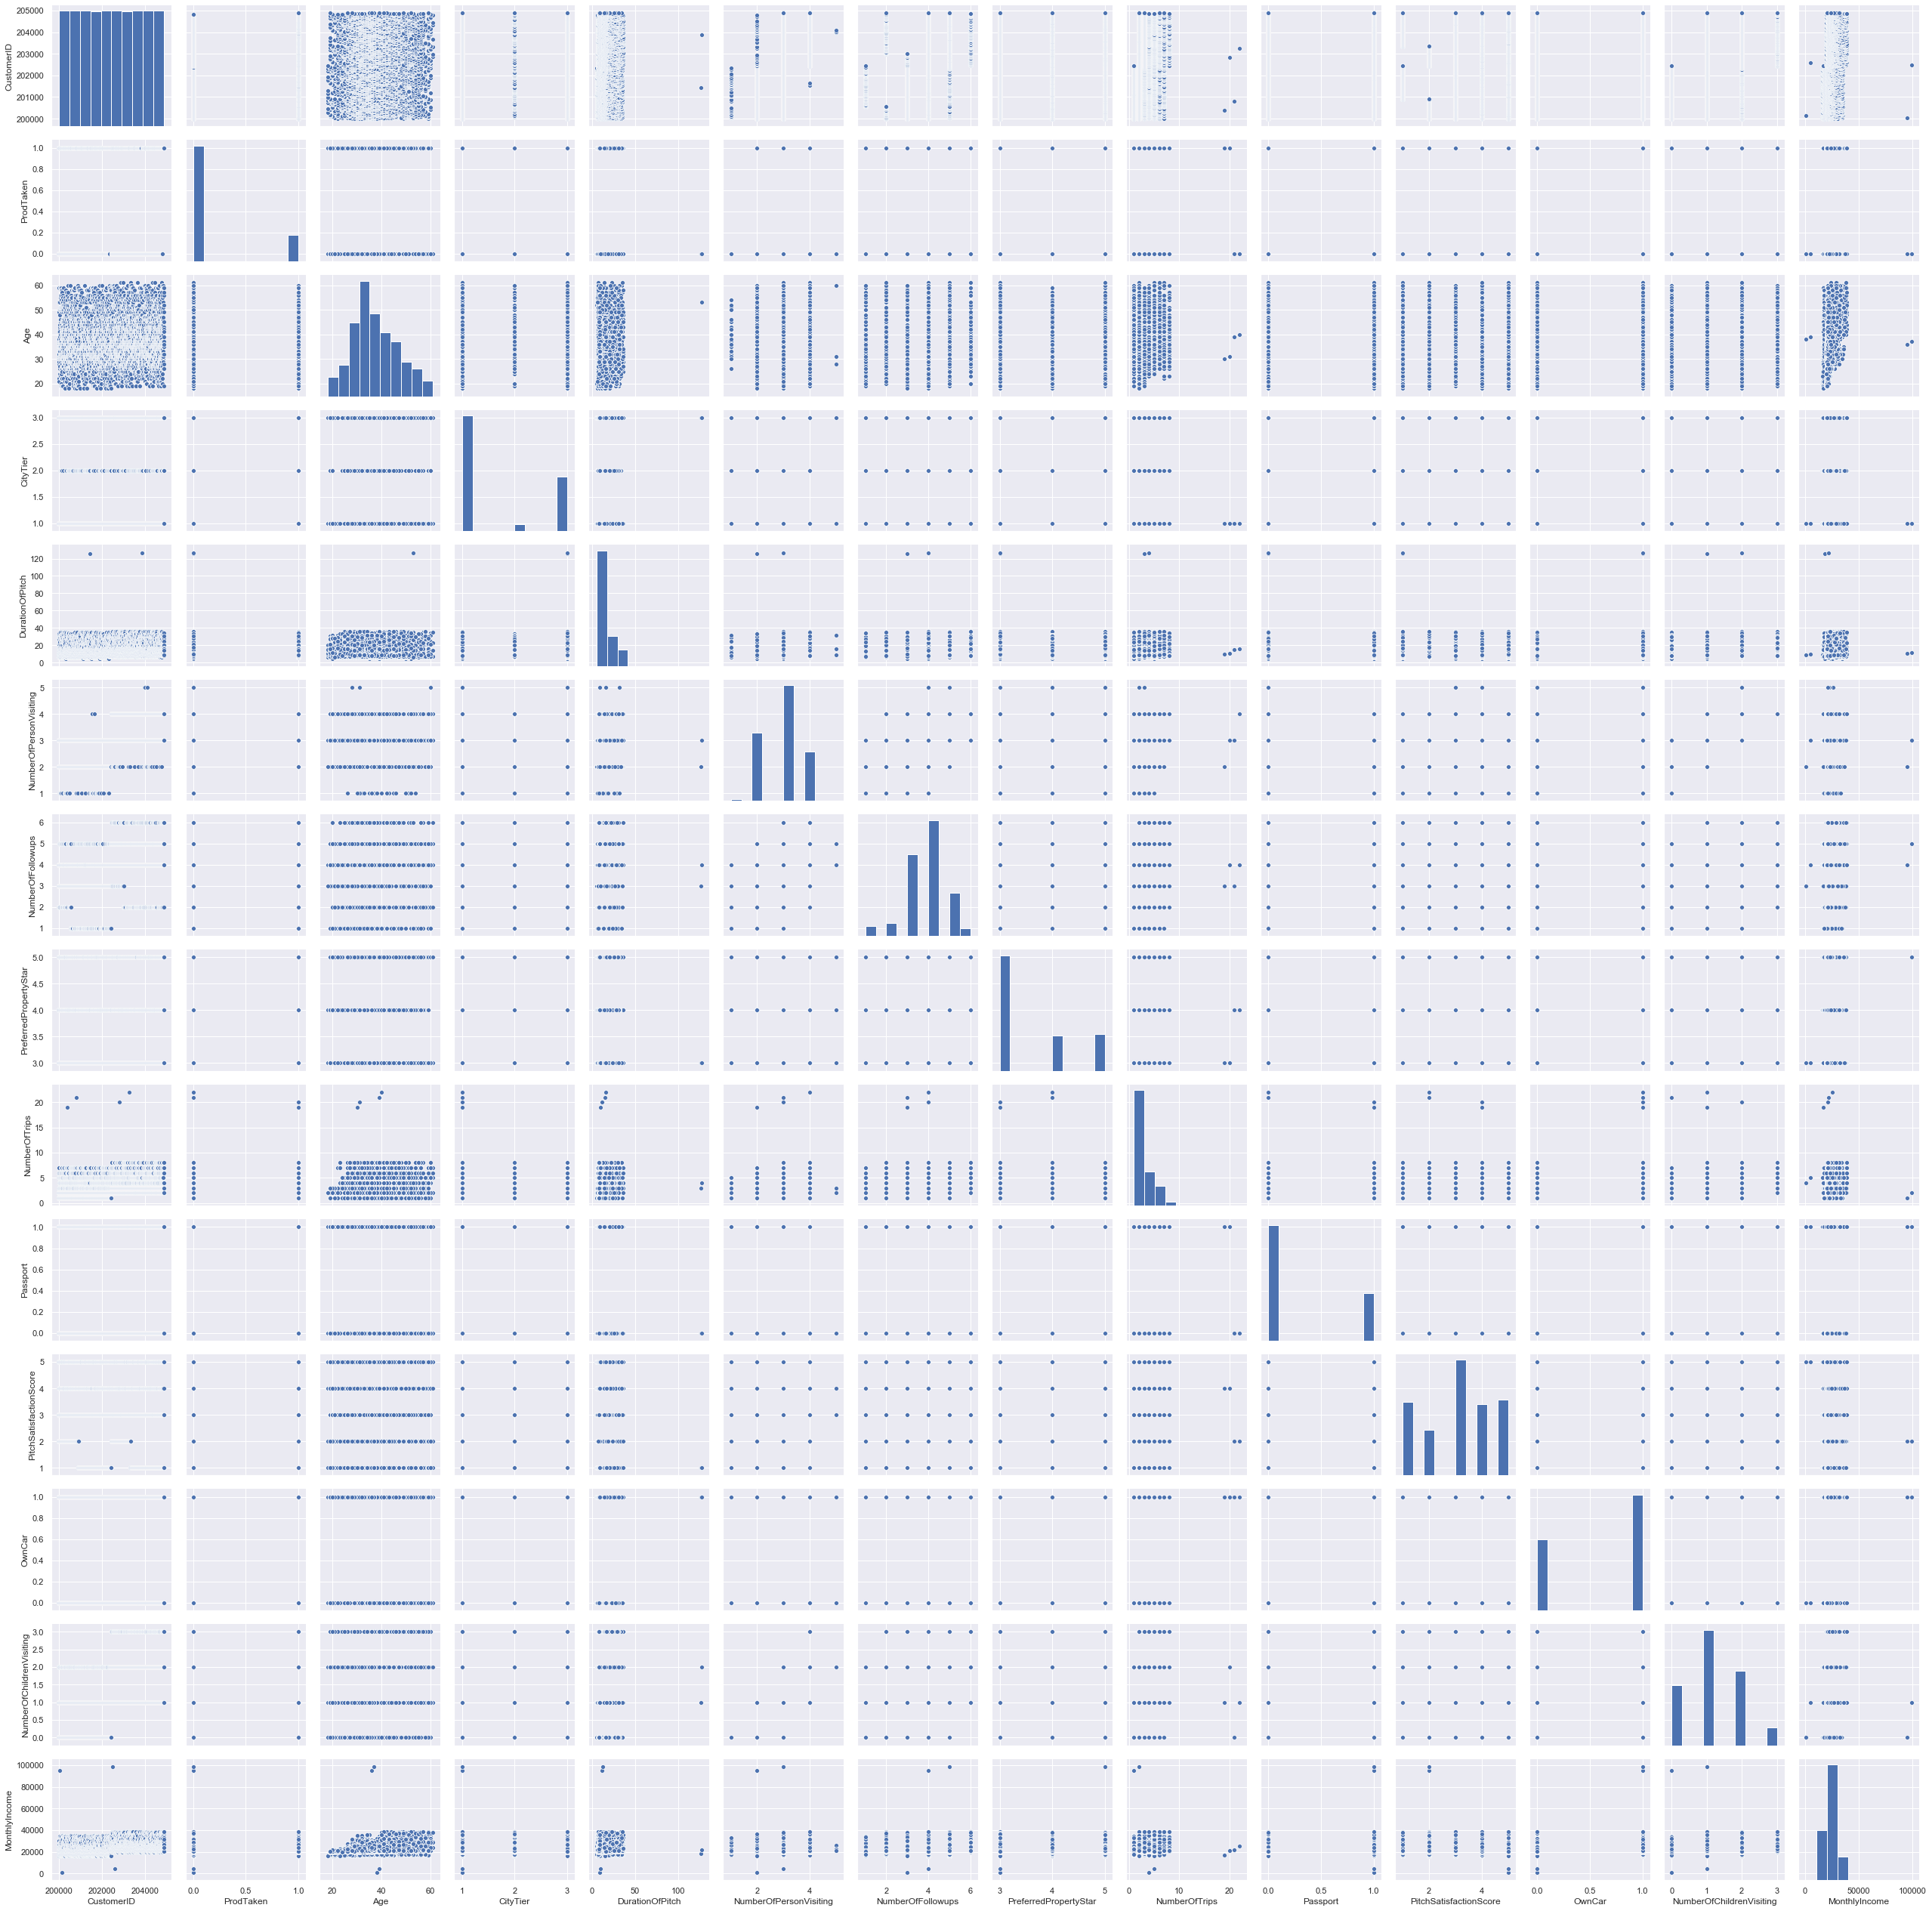

In [35]:
sns.pairplot(Tourism_df)
plt.show()

- Based on above plot, there is no clear correlation between the features. 
But can see slight positive correlation between Age and Monthly income.

# 2. Illustrate the insights based on EDA

### Product Taken vs Customer information

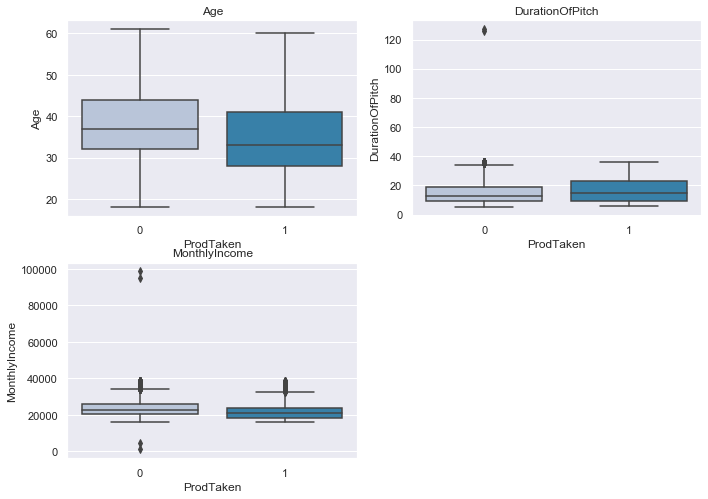

In [36]:
cols = Tourism_df[['Age','DurationOfPitch','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(Tourism_df["ProdTaken"],Tourism_df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- The customers with age between late twenties and early thirties have purchased the package.Some customers with age between mid thirties and early fourties have purchased the package.
- There are some outliers in the duration of pitch for the customers who have not taken packages.
- There are some outliers in the monthly income of the customers. 

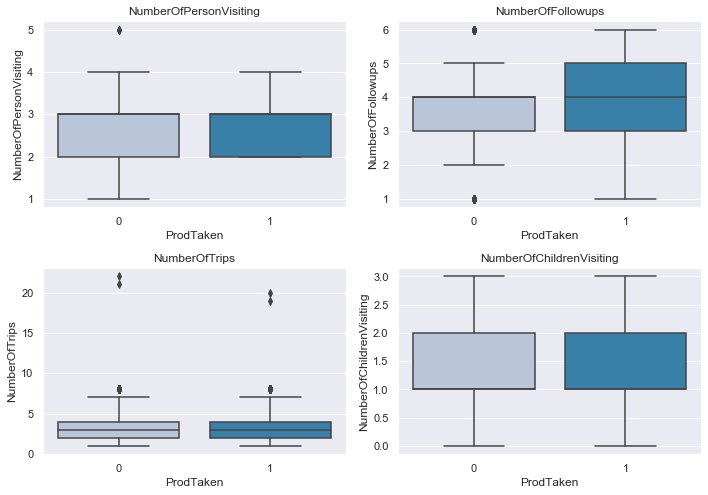

In [37]:
cols = Tourism_df[['NumberOfPersonVisiting','NumberOfFollowups','NumberOfTrips','NumberOfChildrenVisiting',]].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(Tourism_df["ProdTaken"],Tourism_df[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- There are some outliers in upper maximum for feature number of person visiting.
- There are some outliers in both upper maximum and lower minimum for number of followups.
- There are some outliers in upper maximum for feature Number of trips.
- There is no outliers in number of children visiting.

In [38]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,Tourism_df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,Tourism_df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2837  607  3444
All              3946  917  4863
------------------------------------------------------------------------------------------------------------------------


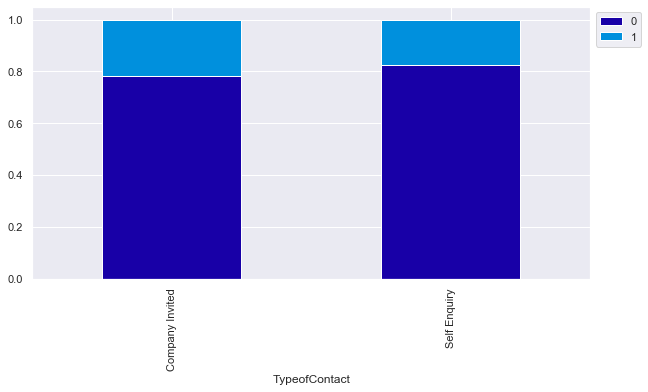

In [39]:
stacked_plot(Tourism_df['TypeofContact'])

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


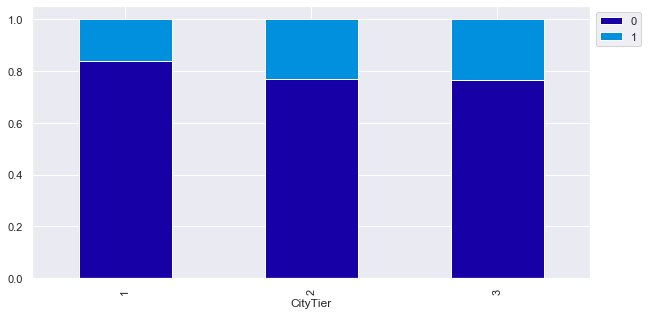

In [40]:
stacked_plot(Tourism_df['CityTier'])

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


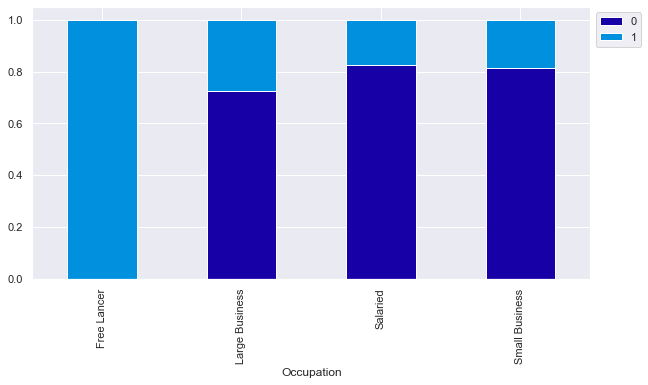

In [41]:
stacked_plot(Tourism_df['Occupation'])

ProdTaken     0    1   All
Gender                    
Fe Male     130   25   155
Female     1500  317  1817
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


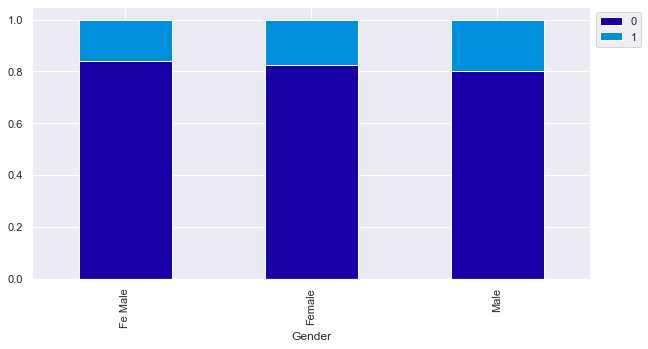

In [42]:
stacked_plot(Tourism_df['Gender'])

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


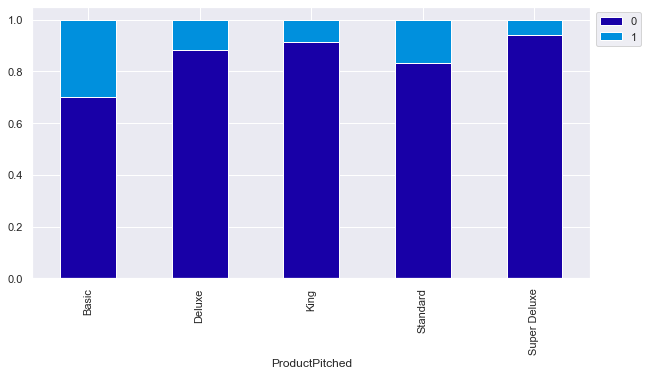

In [43]:
stacked_plot(Tourism_df['ProductPitched'])

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2511  482  2993
4.0                     731  182   913
5.0                     706  250   956
All                    3948  914  4862
------------------------------------------------------------------------------------------------------------------------


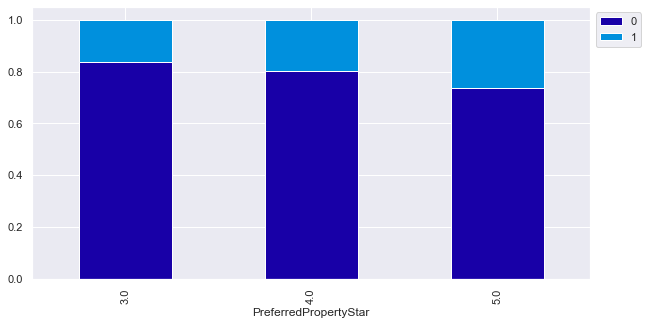

In [44]:
stacked_plot(Tourism_df['PreferredPropertyStar'])

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


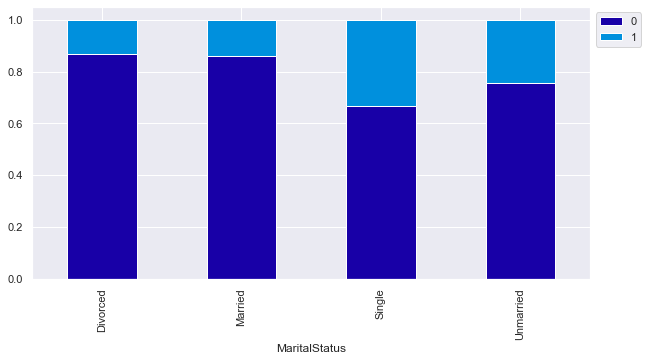

In [45]:
stacked_plot(Tourism_df['MaritalStatus'])

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


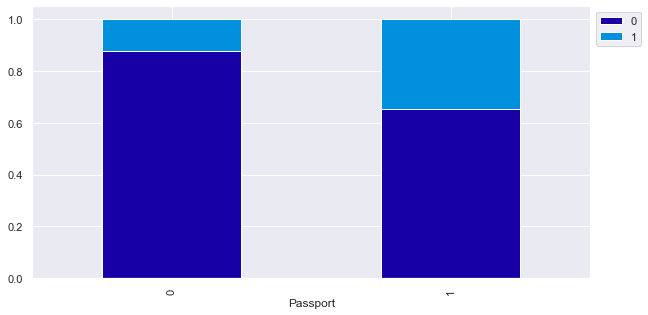

In [46]:
stacked_plot(Tourism_df['Passport'])

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


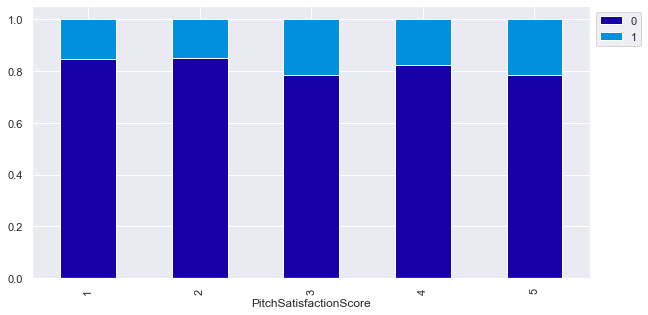

In [47]:
stacked_plot(Tourism_df['PitchSatisfactionScore'])

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


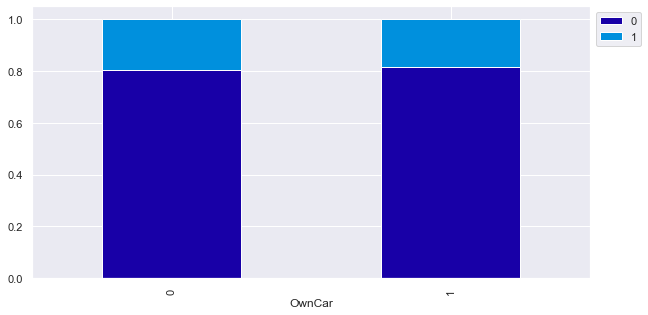

In [48]:
stacked_plot(Tourism_df['OwnCar'])

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


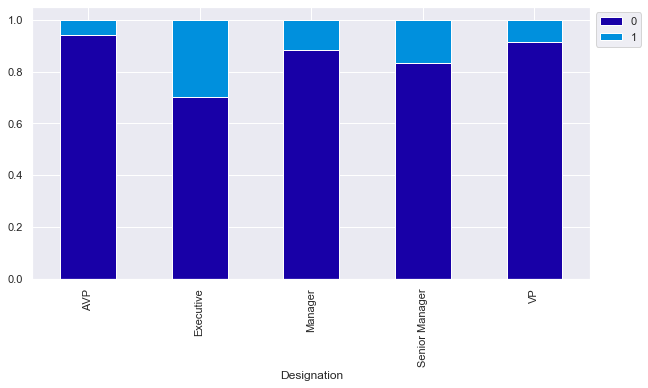

In [49]:
stacked_plot(Tourism_df['Designation'])

# 3. Data pre-processing

### 3.1 Dropping columns which are not adding any information


In [50]:
# The Customer ID is an ID variable and not useful for predictive modelling.So,Customer ID is dropped.
Tourism_df.drop(['CustomerID'],axis=1,inplace=True)

- The Customer ID feature has been dropped.

In [51]:
Tourism_df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


### 3.2 To Fill zero for features having Nan

In [52]:
#Tourism_df = Tourism_df.fillna(0)
Tourism_df.replace(np.nan,0.0,inplace=True)
Tourism_df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,0.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


- To fill zero with features having null values for non-categorial feature. 
- The PreferredPropertyStar is Categorical feature,so we will cast to float. Then fill with 0.0 for having null values. Then cast to Categorical feature

In [53]:
#To replace zero for Categorical feature PreferredPropertyStar
Tourism_df['PreferredPropertyStar'] = Tourism_df['PreferredPropertyStar'].astype('float')
Tourism_df['PreferredPropertyStar'].fillna(0.0, inplace =True)
Tourism_df['PreferredPropertyStar'] = Tourism_df['PreferredPropertyStar'].astype('category')

In [54]:
Tourism_df.isna().sum()

ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

* There are 25 records with Null values for TypeofContact.Out of 25 customers,only 3 customers have taken product. So We will drop this 25 records from the dataframe.

### 3.3 To Drop the records with null values

In [55]:
#To Drop the records with null values i.e 25 records in TypeofContact
Tourism_df = Tourism_df.dropna()
Tourism_df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,0.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


### 3.4 Missing value treatment - Age

***3.4.1 To check the Mean and Median of Age grouped by Occupation, Gender, MaritalStatus, Designation*** 

In [56]:
Tourism_df['Age'].replace(0, np.nan, inplace=True)
print(Tourism_df.groupby(['Occupation','Gender','MaritalStatus','Designation'])['Age'].agg(['mean','median']).round(1))

                                                     mean  median
Occupation     Gender  MaritalStatus Designation                 
Free Lancer    Fe Male Divorced      AVP              NaN     NaN
                                     Executive        NaN     NaN
                                     Manager          NaN     NaN
                                     Senior Manager   NaN     NaN
                                     VP               NaN     NaN
...                                                   ...     ...
Small Business Male    Unmarried     AVP             39.0    39.0
                                     Executive       31.2    31.0
                                     Manager         38.2    35.5
                                     Senior Manager  40.4    39.0
                                     VP               NaN     NaN

[240 rows x 2 columns]


***3.4.2  To replace the age having null values by the mean of Age grouped by Occupation, Gender, MaritalStatus, Designation***

In [57]:
pd.set_option('display.float_format', lambda x: '%.1f' % x) # to display numbers in digits
#To 
meanFiller = lambda x: x.fillna(x.mean())
Tourism_df['Age'] = Tourism_df.groupby(['Occupation','Gender','MaritalStatus','Designation'])['Age'].transform(meanFiller)

- The age with null values are filled with mean of Ages based on group by Occupation, Gender, Marital status and Designation.

In [58]:
Tourism_df.head(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,34.1,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


### 3.5 Missing value treatment - Monthly Income

***3.5.1 To check the Mean and Median of Monthly income grouped by Occupation, Gender, Designation***

In [59]:
Tourism_df['MonthlyIncome'].replace(0, np.nan, inplace=True)
print(Tourism_df.groupby(['Occupation','Gender','Designation'])['MonthlyIncome'].agg(['mean','median']).round(1))

                                         mean  median
Occupation     Gender  Designation                   
Free Lancer    Fe Male AVP                nan     nan
                       Executive          nan     nan
                       Manager            nan     nan
                       Senior Manager     nan     nan
                       VP                 nan     nan
               Female  AVP                nan     nan
                       Executive          nan     nan
                       Manager            nan     nan
                       Senior Manager     nan     nan
                       VP                 nan     nan
               Male    AVP                nan     nan
                       Executive      18929.0 18929.0
                       Manager            nan     nan
                       Senior Manager     nan     nan
                       VP                 nan     nan
Large Business Fe Male AVP            28142.0 28142.0
                       Execu

***3.5.2  To replace the monthly income having null values by the mean of monthly income grouped by Occupation, Gender, Designation***

In [60]:
pd.set_option('display.float_format', lambda x: '%.1f' % x) # to display numbers in digits
meanFiller = lambda x: x.fillna(x.mean())
Tourism_df['MonthlyIncome'] = Tourism_df.groupby(['Occupation','Gender','Designation'])['MonthlyIncome'].transform(meanFiller)

- The fill monthly income with null values with Mean of monthly income based on group by Occupation, Gender, Designation.

In [61]:
Tourism_df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,34.1,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [62]:
#To check for the missing values
Tourism_df.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

- There are no null values. All null values has been treated.

### 3.6 Outliers in every numerical column

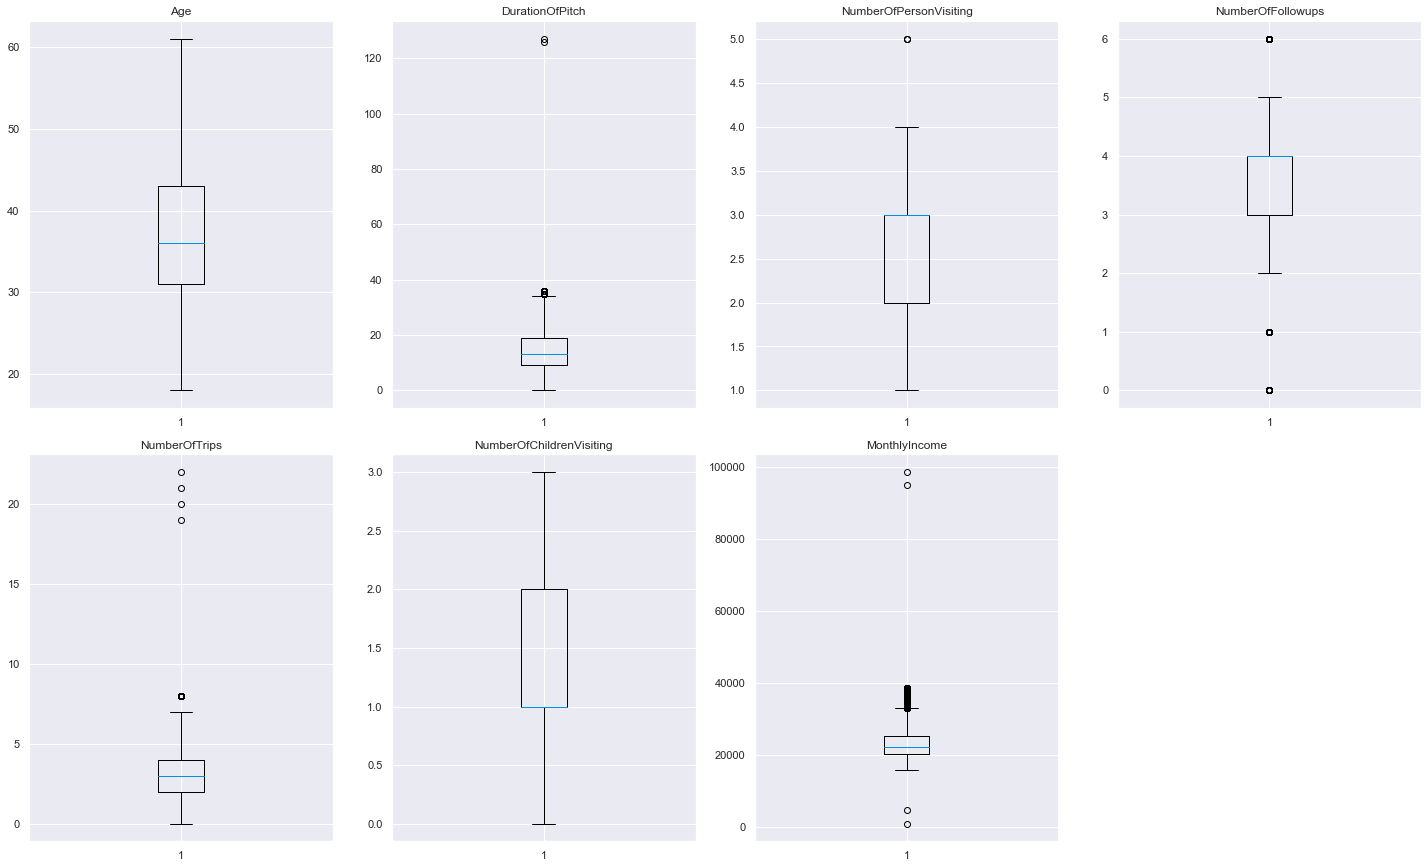

In [63]:
# outlier detection using boxplot
numeric_columns = Tourism_df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(Tourism_df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

***Observations***
- There are no outliers in Age and number of children visiting.
- There are some outliers in duration of pitch, number of person visiting, number of followups, number of trips and monthly income.

### Outliers treatment.

In [64]:
# Lets treat outliers by flooring and capping
def treat_outliers(Tourism_df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=Tourism_df[col].quantile(0.25) # 25th quantile
    Q3=Tourism_df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    Tourism_df[col] = np.clip(Tourism_df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return Tourism_df

def treat_outliers_all(Tourism_df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        Tourism_df = treat_outliers(Tourism_df,c)
        
    return Tourism_df
    

In [65]:
#Treating the outiers
numerical_col = Tourism_df.select_dtypes(include=np.number).columns.tolist()
Tourism_df = treat_outliers_all(Tourism_df,numerical_col)

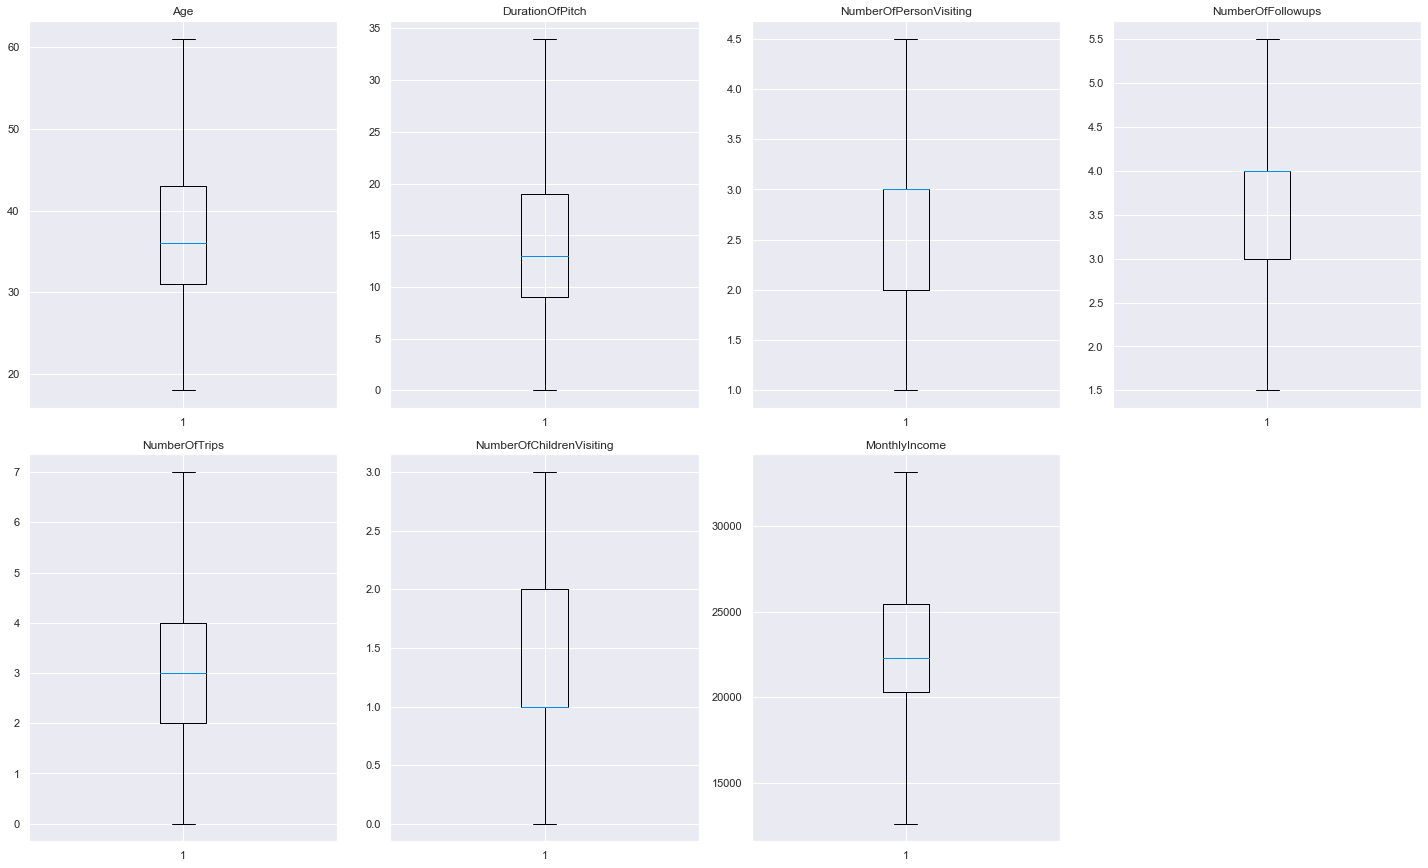

In [66]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(Tourism_df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

****Outliers have been treated**

### 3.7 Get dummies for Categorical fields

In [67]:
pd.set_option('display.float_format', lambda x: '%.1f' % x) # to display numbers in digits
Tourism_df_New = Tourism_df
Tourism_df_New = pd.get_dummies(Tourism_df_New, columns=['TypeofContact','CityTier','Occupation','Gender','ProductPitched','PreferredPropertyStar','MaritalStatus','PitchSatisfactionScore','Designation'], drop_first=True)
Tourism_df_New.head()

,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,...,MaritalStatus_Single,MaritalStatus_Unmarried,PitchSatisfactionScore_2,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,6.0,3.0,3.0,1.0,1,1,0.0,20993.0,...,1,0,1,0,0,0,0,1,0,0
1,0,49.0,14.0,3.0,4.0,2.0,0,1,2.0,20130.0,...,0,0,0,1,0,0,0,1,0,0
2,1,37.0,8.0,3.0,4.0,7.0,1,0,0.0,17090.0,...,1,0,0,1,0,0,1,0,0,0
3,0,33.0,9.0,2.0,3.0,2.0,1,1,1.0,17909.0,...,0,0,0,0,0,1,1,0,0,0
4,0,34.1,8.0,2.0,3.0,1.0,0,1,0.0,18468.0,...,0,0,0,0,0,1,1,0,0,0


### 3.8 Prepare Data for Modeling

In [68]:
data = Tourism_df_New.copy()

X = data.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['ProdTaken']

In [69]:
X.head(10)

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,...,PitchSatisfactionScore_2,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,Passport_1,OwnCar_1
0,41.0,6.0,3.0,3.0,1.0,0.0,20993.0,1,0,1,...,1,0,0,0,0,1,0,0,1,1
1,49.0,14.0,3.0,4.0,2.0,2.0,20130.0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,37.0,8.0,3.0,4.0,7.0,0.0,17090.0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,33.0,9.0,2.0,3.0,2.0,1.0,17909.0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
4,34.1,8.0,2.0,3.0,1.0,0.0,18468.0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
5,32.0,8.0,3.0,3.0,1.0,1.0,18068.0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
6,59.0,9.0,2.0,2.0,5.0,1.0,17670.0,1,0,0,...,1,0,0,0,1,0,0,0,1,1
7,30.0,30.0,3.0,3.0,2.0,1.0,17693.0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
8,38.0,29.0,2.0,4.0,1.0,0.0,24526.0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9,36.0,33.0,3.0,3.0,7.0,0.0,20237.0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [70]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3404, 35) (1459, 35)


In [71]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # to display numbers in digits
y.value_counts(1)

0   0.81
1   0.19
Name: ProdTaken, dtype: float64

In [72]:
y_test.value_counts(1)

0   0.81
1   0.19
Name: ProdTaken, dtype: float64

# 4. Model building - Bagging

### 4.1 To Build the Model

Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.

In [73]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [74]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [75]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [76]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 4.2 Decision Tree 

In [77]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [78]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.19, 1: 0.81},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

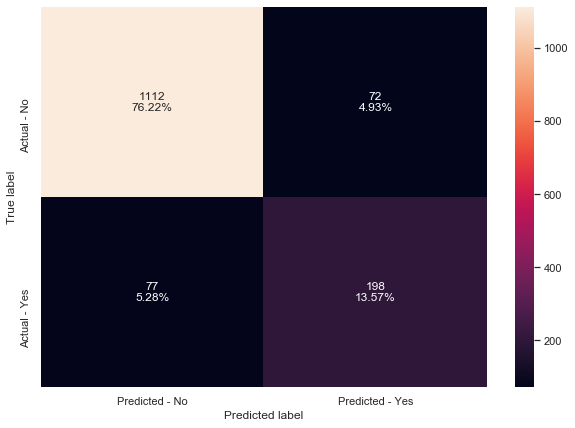

In [79]:
make_confusion_matrix(dtree,y_test)

In [80]:
dtree_acc = get_accuracy_score(dtree)
dtree_recall = get_recall_score(dtree)
dtree_precision = get_precision_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8978752570253599
Recall on training set :  1.0
Recall on test set :  0.72
Precision on training set :  1.0
Precision on test set :  0.7333333333333333


### 4.3 Bagging Classifier

In [81]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

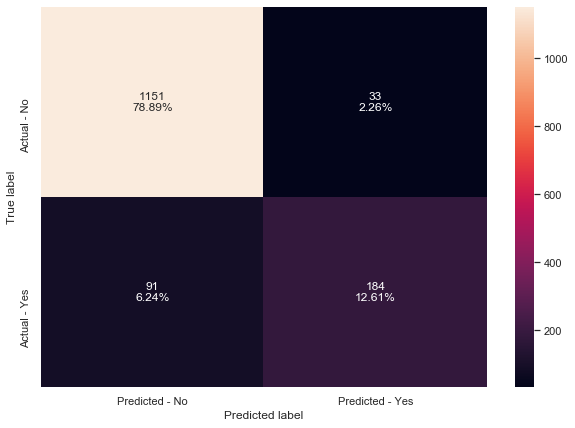

In [82]:
make_confusion_matrix(bagging,y_test)

In [83]:
bagging_acc = get_accuracy_score(bagging)
bagging_recall = get_recall_score(bagging)
bagging_precision = get_precision_score(bagging)

Accuracy on training set :  0.9926556991774383
Accuracy on test set :  0.9150102810143934
Recall on training set :  0.9672897196261683
Recall on test set :  0.6690909090909091
Precision on training set :  0.9936
Precision on test set :  0.847926267281106


***Bagging Classifier with weighted decision tree***

In [84]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='depr

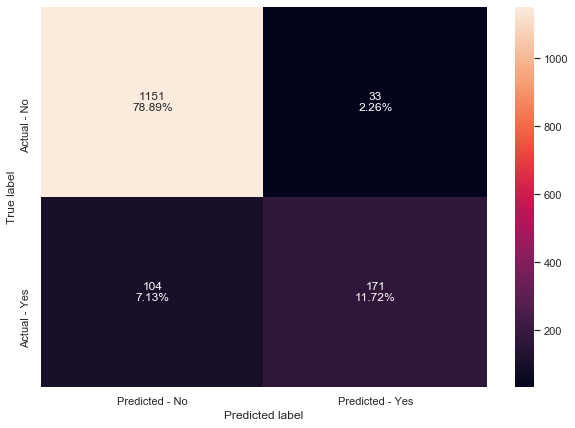

In [85]:
make_confusion_matrix(bagging_wt,y_test)

In [86]:
wt_bagging_acc = get_accuracy_score(bagging_wt)
wt_bagging_recall = get_recall_score(bagging_wt)
wt_bagging_precision = get_precision_score(bagging_wt)

Accuracy on training set :  0.9947121034077556
Accuracy on test set :  0.906100068540096
Recall on training set :  0.9719626168224299
Recall on test set :  0.6218181818181818
Precision on training set :  1.0
Precision on test set :  0.8382352941176471


### 4.4 Random Forest

In [87]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

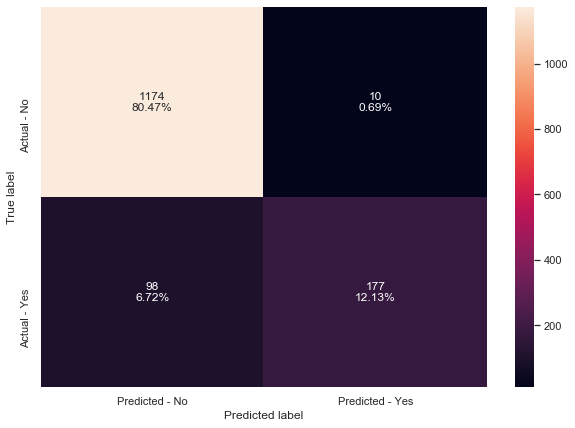

In [88]:
make_confusion_matrix(rf,y_test)

In [89]:
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9259766963673749
Recall on training set :  1.0
Recall on test set :  0.6436363636363637
Precision on training set :  1.0
Precision on test set :  0.946524064171123


**Random forest with weighted decision tree**

In [90]:
rf_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.19, 1: 0.81}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

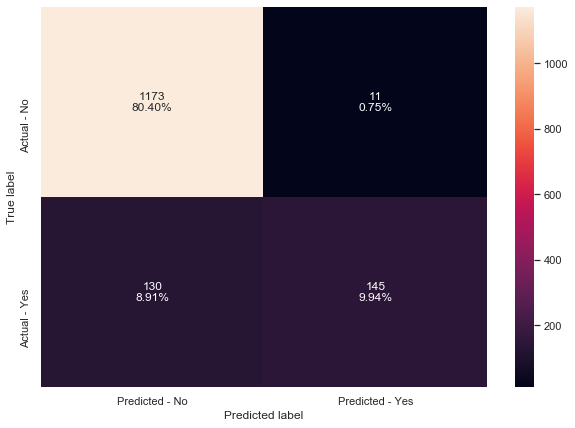

In [91]:
make_confusion_matrix(rf_wt,y_test)

In [92]:
wt_rf_acc = get_accuracy_score(rf_wt)
wt_rf_recall = get_recall_score(rf_wt)
wt_rf_precision = get_precision_score(rf_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.9033584647018505
Recall on training set :  1.0
Recall on test set :  0.5272727272727272
Precision on training set :  1.0
Precision on test set :  0.9294871794871795


**With default parameters:**

- The decision tree and random forest classifier are overfitting the train data.
- The bagging classifier and random forest are giving similar performance in terms of accuracy but decision tree is giving better recall.
- The random forest classifier is giving better precision but low recall.

### 4.5 Tuning Models

**Tuning Decision Tree**

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.19, 1: 0.81},
                       criterion='gini', max_depth=7, max_features=None,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

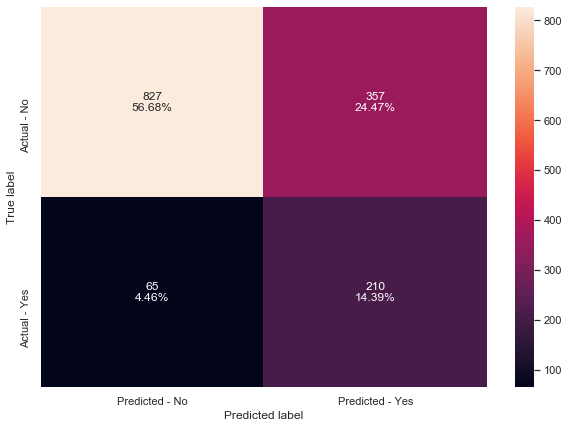

In [95]:
make_confusion_matrix(dtree_estimator,y_test)

In [96]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator)
tuned_dtree_recall = get_recall_score(dtree_estimator)
tuned_dtree_precision = get_precision_score(dtree_estimator)

Accuracy on training set :  0.7303172737955347
Accuracy on test set :  0.7107607950651131
Recall on training set :  0.780373831775701
Recall on test set :  0.7636363636363637
Precision on training set :  0.392018779342723
Precision on test set :  0.37037037037037035


### Insights
- We can see that train accuracy and recall for the decision tree classifier have increased slightly after hyperparameter tuning but the test accuracy has decreased. The test recall has increased
- The confusion matrix shows that the model is better at identifying Customers who don't buy package as compared to those who buy.

**Tuning Bagging Classifier**

In [97]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=1,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight...
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                  

In [98]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='depr

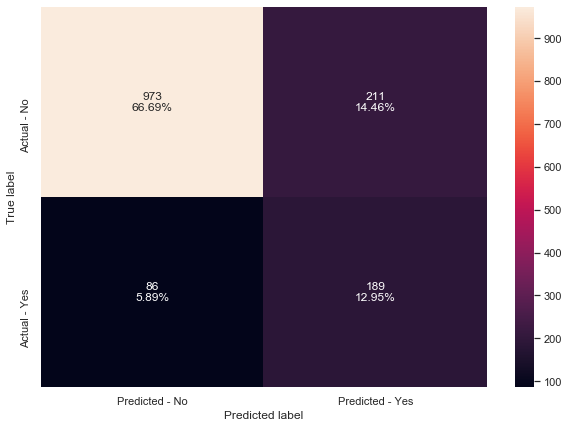

In [99]:
make_confusion_matrix(bagging_estimator,y_test)

In [100]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)
tuned_bagging_recall = get_recall_score(bagging_estimator)
tuned_bagging_precision = get_precision_score(bagging_estimator)

Accuracy on training set :  0.8257931844888367
Accuracy on test set :  0.796435915010281
Recall on training set :  0.7710280373831776
Recall on test set :  0.6872727272727273
Precision on training set :  0.5260361317747078
Precision on test set :  0.4725


### Insights
- We can see that test recall has slightly increased after the tuning on bagging classifier.
- The train and test accuracy and precision has reduced after tuning.
- The confusion matrix shows that the model is better at identifying Customers who don't buy package as compared to those who buy.

**Tuning Random Forest**

In [101]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

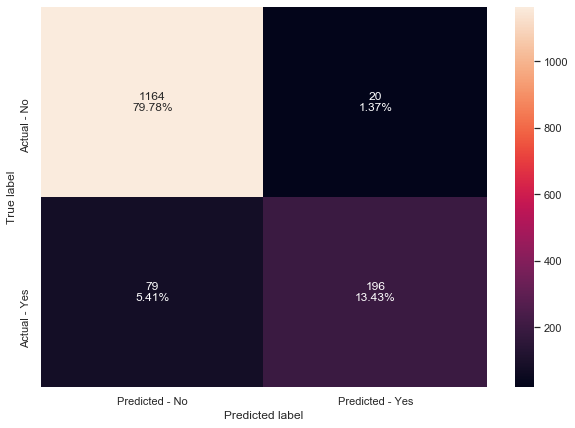

In [102]:
make_confusion_matrix(rf_estimator,y_test)

In [103]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.932145305003427
Recall on training set :  1.0
Recall on test set :  0.7127272727272728
Precision on training set :  1.0
Precision on test set :  0.9074074074074074


### Insights
- We can see that test recall has slightly increased after the tuning on Random forest.
- The confusion matrix shows that the model is better at identifying Customers who don't buy package as compared to those who buy. But our aim to find potential customer who is going to purchase the newly introduced travel package.

# 5. Model performance improvement - Bagging

### Comparing all the models

In [104]:
pd.set_option('display.float_format', lambda x: '%.6f' % x) # to display numbers in digits
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [105]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.897875,1.000000,0.720000,1.000000,0.733333
1,Tuned Decision Tree,0.730317,0.710761,0.780374,0.763636,0.392019,0.370370
2,Bagging Classifier,0.992656,0.915010,0.967290,0.669091,0.993600,0.847926
3,Weighted Bagging Classifier,0.994712,0.906100,0.971963,0.621818,1.000000,0.838235
4,Tuned Bagging Classifier,0.825793,0.796436,0.771028,0.687273,0.526036,0.472500
5,Random Forest,1.000000,0.925977,1.000000,0.643636,1.000000,0.946524
6,Weighted Random Forest,1.000000,0.903358,1.000000,0.527273,1.000000,0.929487
7,Tuned Random Forest,1.000000,0.932145,1.000000,0.712727,1.000000,0.907407


**5.1 Metric for model performance evaluation : Precision, Recall and F1**

For classication models,Once we build the model to predict certain class category,We need to find how accurate the 
predictions are. So the metrics used are Precision, Recall and F1.

Our aim is to predict the potential customer who is going to purchase the newly introduced travel package.
So, we need to concentrate on Recall. i.e model perform in correctly identifying donors among all true donors.
Recall or sensitivity is the ratio of all correctly identified positive cases divided by all actually positive cases.


**Decision Tree:** 
- Decision Tree performed well on training and test set.
- Decision Tree after tuning, the test Recall slighly increased by Precision decreased.


**Bagging Classifier:**
- Bagging Classifier performed well on training and test set.
- Weighted Bagging Classifier gave almost slight less Recall than Bagging Classifier.
- Bagging Classifier after tuning, the test Recall has slighly increased.


**Random Forest:**
- The Random Forest, Weighted Random Forest,Tuned Random Forest all models are overfitting the training data.
- The Tuned Random Forest has better test recall compared to Random forest and Weighted Random forest.

**5.2 Comparing all the 3 models:** 
- The Tuned Decision Tree has a better test Recall compared to other models but its f1-score is less.
- The Tuned Random Forest is giving the highest f1-score on the test data but is overfitting the training data.
- The Bagging Classifier has not overfit on training data. It has a better test Recall and f1-score on test data.
  
  So the Bagging Classifier is giving more generalized performance as compared to the Tuned Random Forest. 

**5.3 Model performance improvement:**
- The model performance be improved by better parameters which may result in a better accuracy and recall.
- The final results depend on the parameters used/checked using GridSearchCV.
- The Feature importance also gives the most important factors in identifying potential customer who will buy package.


#### Feature importance of Random Forest

In [106]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                 Imp
Age                         0.121895
MonthlyIncome               0.117368
DurationOfPitch             0.098481
Passport_1                  0.072443
NumberOfTrips               0.061277
NumberOfFollowups           0.049915
NumberOfChildrenVisiting    0.031138
CityTier_3                  0.028315
NumberOfPersonVisiting      0.028048
MaritalStatus_Single        0.025913
Designation_Executive       0.025022
TypeofContact_Self Enquiry  0.024818
OwnCar_1                    0.020963
PitchSatisfactionScore_4    0.020762
PitchSatisfactionScore_3    0.019996
PitchSatisfactionScore_5    0.019970
PreferredPropertyStar_3.0   0.019397
Occupation_Salaried         0.019189
PreferredPropertyStar_5.0   0.019116
Occupation_Small Business   0.018630
Gender_Male                 0.018280
Gender_Female               0.017761
MaritalStatus_Married       0.016515
MaritalStatus_Unmarried     0.015348
PreferredPropertyStar_4.0   0.014256
Occupation_Large Business   0.013686
D

In [107]:
feature_names = X_train.columns

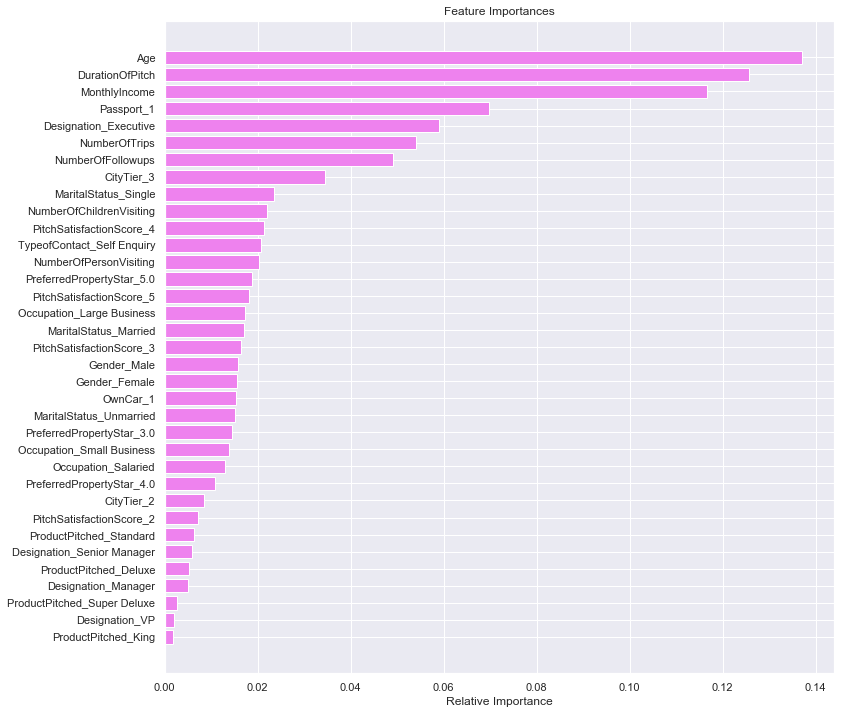

In [108]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Age is the most important feature in identifying potential customer who is going to purchase package,followed by duration of pitch and Monthly income.

# 6. Model building - Boosting

In [163]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### 6.1 AdaBoost Classifier

In [164]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [165]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8510575793184488
Accuracy on test set :  0.8546949965729952
Recall on training set :  0.35202492211838005
Recall on test set :  0.36
Precision on training set :  0.7129337539432177
Precision on test set :  0.7333333333333333
F1-Score on training set :  0.47132429614181437
F1-Score on test set :  0.4829268292682926


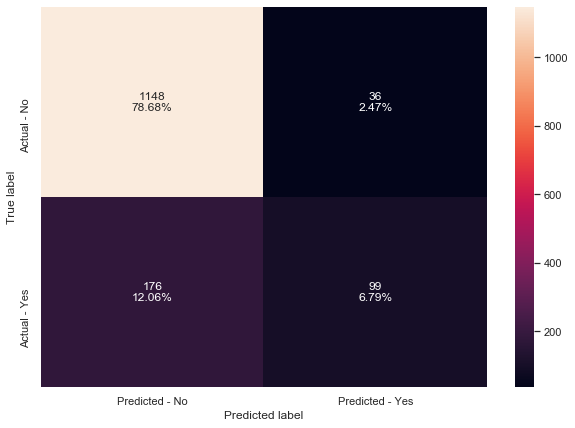

In [166]:
make_confusion_matrix(abc,y_test)

### 6.2 Gradient Boosting Classifier

In [167]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [168]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8898354876615746
Accuracy on test set :  0.8766278272789582
Recall on training set :  0.46417445482866043
Recall on test set :  0.4290909090909091
Precision on training set :  0.9057750759878419
Precision on test set :  0.8368794326241135
F1-Score on training set :  0.6138002059732235
F1-Score on test set :  0.5673076923076923


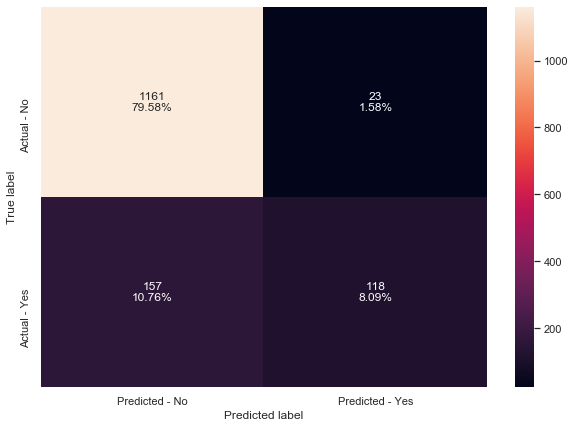

In [169]:
make_confusion_matrix(gbc,y_test)

### 6.3 XGBoost Classifier

In [170]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [171]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9997062279670975
Accuracy on test set :  0.9389993145990404
Recall on training set :  0.9984423676012462
Recall on test set :  0.7563636363636363
Precision on training set :  1.0
Precision on test set :  0.9043478260869565
F1-Score on training set :  0.9992205767731879
F1-Score on test set :  0.8237623762376236


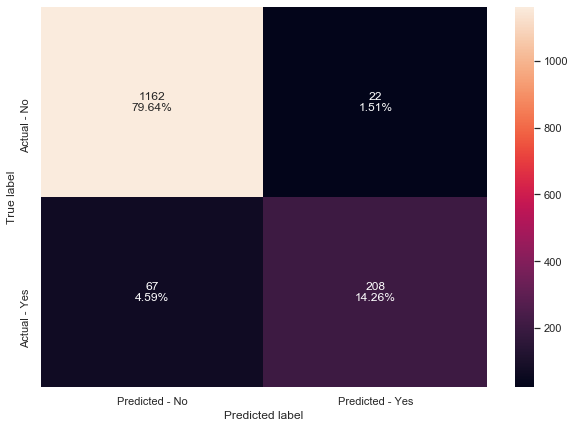

In [172]:
make_confusion_matrix(xgb,y_test)

**With default parameters:**
- XGBoost classifier has better test accuracy among these 3 models.
- Adaboost has least test accuracy and test recall.

### 6.4 Hyperparameter Tuning

#### AdaBoost Classifier Tuned

In [119]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [173]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9876615746180963
Accuracy on test set :  0.8629198080877313
Recall on training set :  0.9501557632398754
Recall on test set :  0.6727272727272727
Precision on training set :  0.9838709677419355
Precision on test set :  0.6271186440677966
F1-Score on training set :  0.9667194928684627
F1-Score on test set :  0.6491228070175439


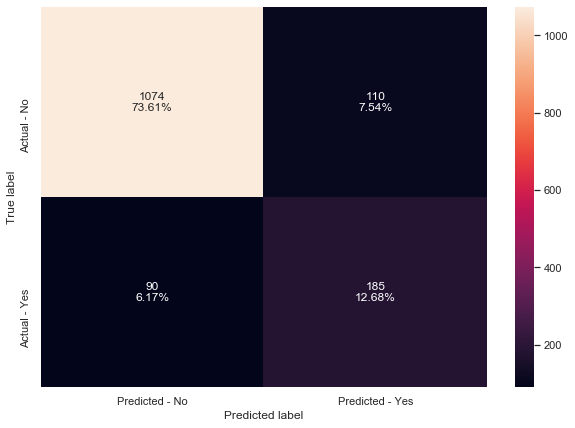

In [174]:
make_confusion_matrix(abc_tuned,y_test)

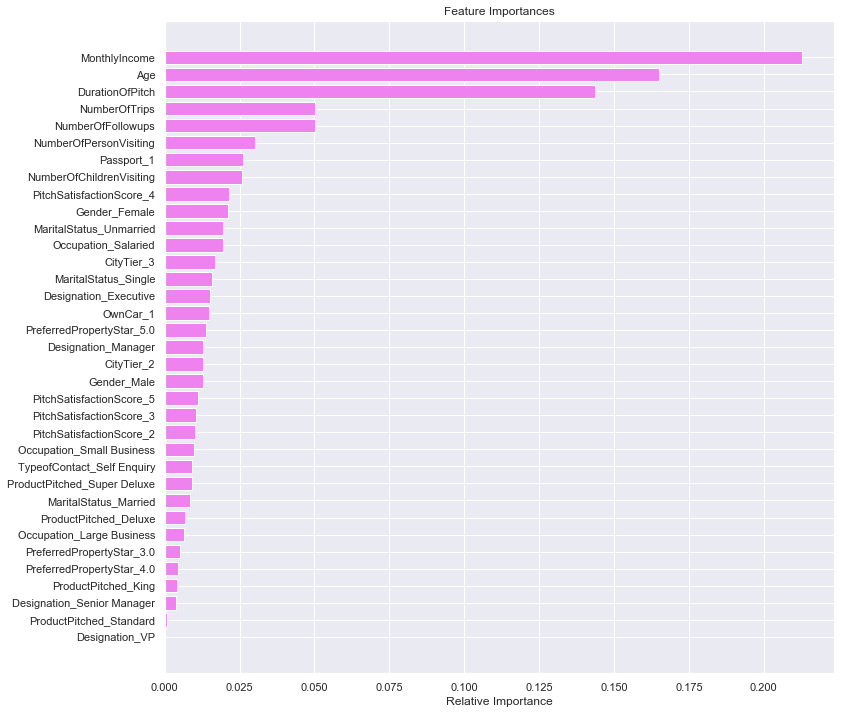

In [175]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Monthly income is most important feature as per Adaboost classifier. Followed by Age and duration of Pitch.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [123]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
            

In [176]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8895417156286721
Accuracy on test set :  0.8752570253598355
Recall on training set :  0.470404984423676
Recall on test set :  0.4290909090909091
Precision on training set :  0.893491124260355
Precision on test set :  0.8251748251748252
F1-Score on training set :  0.6163265306122448
F1-Score on test set :  0.5645933014354068


**As compared to the model with default parameters:**

- Test recall has been same.
- As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

#### GradientBoosting Tuned

In [126]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
             

In [177]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9268507638072856
Accuracy on test set :  0.8869088416723784
Recall on training set :  0.6433021806853583
Recall on test set :  0.5163636363636364
Precision on training set :  0.953810623556582
Precision on test set :  0.8160919540229885
F1-Score on training set :  0.7683720930232558
F1-Score on test set :  0.6325167037861915


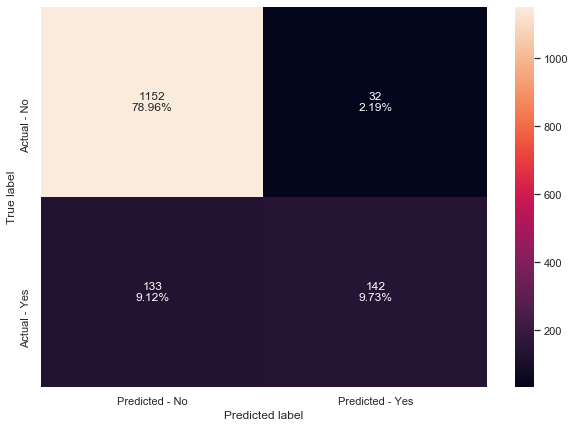

In [178]:
make_confusion_matrix(gbc_tuned,y_test)

#### Insights
- The model performace has not increased by much.
- The model has not overfit the train data.
- It is better at identifying non purchaser than identifying purchasers which is the opposite of the result we need.

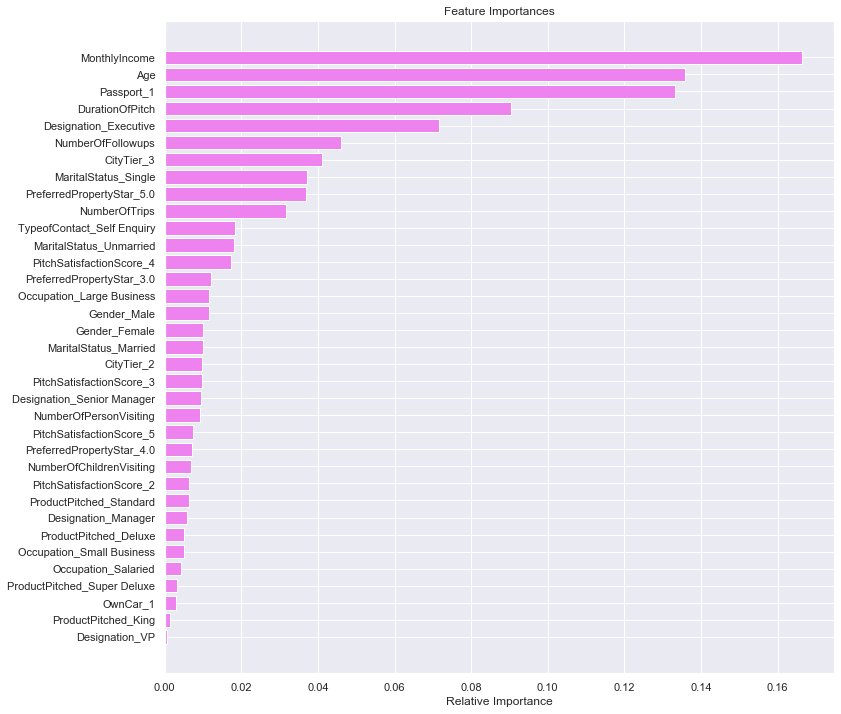

In [179]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Monthly income is the most important feature as per Gradient boosting classifier, followed by Age and passport.

#### XGBoost Classifier Tuned

In [130]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
#Calculating different metrics
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9794359576968272
Accuracy on test set :  0.914324880054832
Recall on training set :  0.9968847352024922
Recall on test set :  0.850909090909091
Precision on training set :  0.903954802259887
Precision on test set :  0.7358490566037735
F1-Score on training set :  0.9481481481481482
F1-Score on test set :  0.7892074198988196


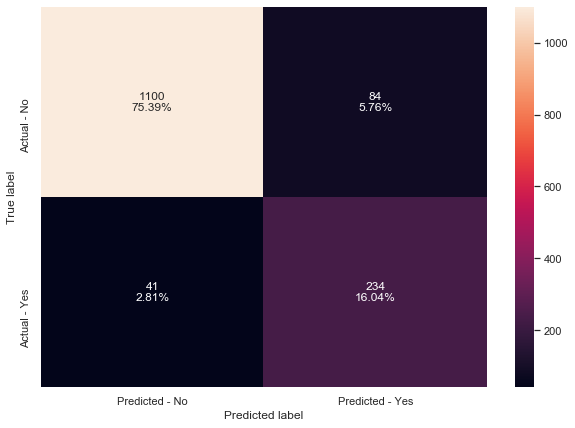

In [181]:
#Creating confusion matrix
make_confusion_matrix(xgb_tuned,y_test)

- The Accuracy, Recall and F1 score is good and no overfit the training data.
- The confusion matrix shows that the model is able to identify the majority of Customers who buy packages compared to Adaboost and Gradient boosting. 

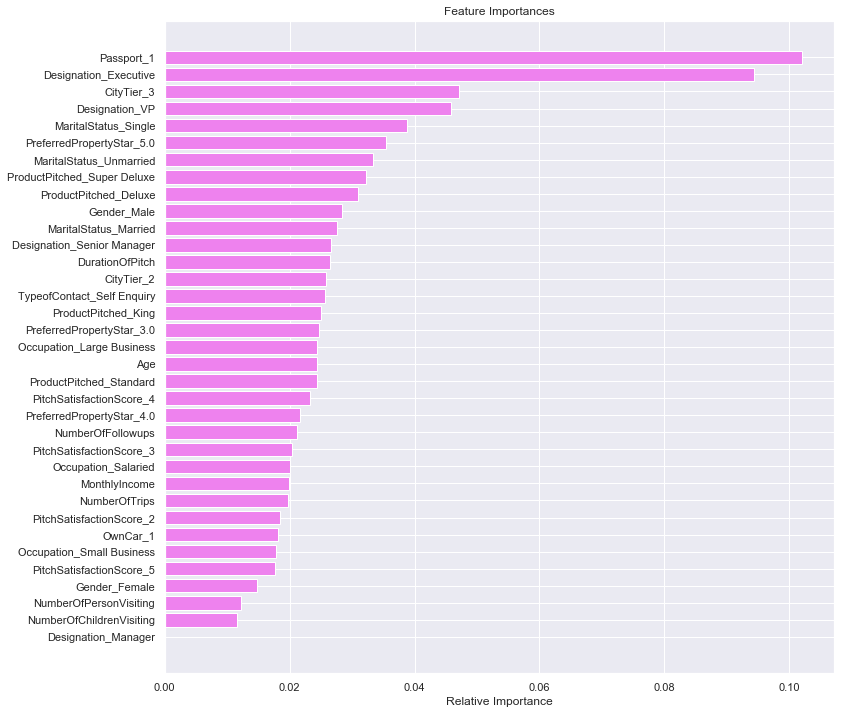

In [182]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- For XGBoost Classifier, the most important feature is Passport followed by Designation executive and City Tier3.

### 6.5 Stacking Model

In [183]:
estimators = [('Random Forest',rf_estimator), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('Random Forest',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=0.9,
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                             

Accuracy on training set :  0.9988249118683902
Accuracy on test set :  0.9211788896504455
Recall on training set :  1.0
Recall on test set :  0.8909090909090909
Precision on training set :  0.9938080495356038
Precision on test set :  0.7424242424242424
F1-Score on training set :  0.9968944099378882
F1-Score on test set :  0.8099173553719009


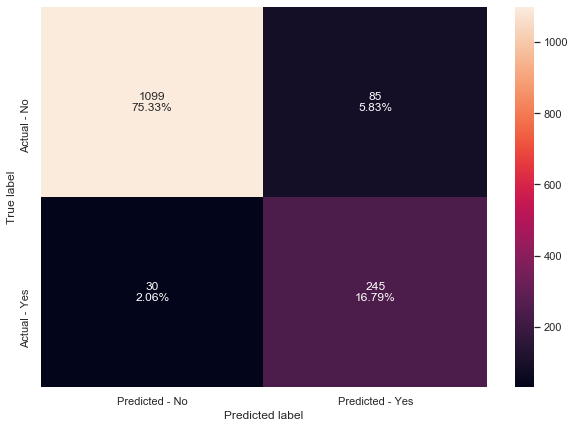

In [184]:
#Calculating different metrics
get_metrics_score(stacking_classifier)

#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

### Insights
- The Accuracy, Recall and F1 score is good but has overfit the training data.
- The confusion matrix shows that the model is able to identify the majority of Customers who buy packages compared to Adaboost and Gradient boosting. 

# 7.Model performance improvement - Boosting

## Comparing all models

In [187]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [188]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned','Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 
#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
5,XGBoost with default parameters,0.999706,0.938999,0.998442,0.756364,1.000000,0.904348,0.999221,0.823762
7,Stacking Classifier,0.998825,0.921179,1.000000,0.890909,0.993808,0.742424,0.996894,0.809917
6,XGBoost Tuned,0.979436,0.914325,0.996885,0.850909,0.903955,0.735849,0.948148,0.789207
1,AdaBoost Tuned,0.987662,0.862920,0.950156,0.672727,0.983871,0.627119,0.966719,0.649123
4,Gradient Boosting Tuned,0.926851,0.886909,0.643302,0.516364,0.953811,0.816092,0.768372,0.632517
2,Gradient Boosting with default parameters,0.889835,0.876628,0.464174,0.429091,0.905775,0.836879,0.613800,0.567308
3,Gradient Boosting with init=AdaBoost,0.889542,0.875257,0.470405,0.429091,0.893491,0.825175,0.616327,0.564593
0,AdaBoost with default paramters,0.851058,0.854695,0.352025,0.360000,0.712934,0.733333,0.471324,0.482927


**7.1 Metric for model performance evaluation : Precision, Recall and F1 score**

For classication models,Once we build the model to predict certain class category,We need to find how accurate the 
predictions are. So the metrics used are Precision, Recall and F1.

Our aim is to predict the potential customer who is going to purchase the newly introduced travel package.
So, we need to concentrate on Recall. i.e model perform in correctly identifying donors among all true donors.
Recall or sensitivity is the ratio of all correctly identified positive cases divided by all actually positive cases.

**7.2 Comparing all the models:** 
- The XGBoost with default parameters is giving the highest f1-score on the test data but is overfitting the training data.
- The Stacking Classifier has given the second highest test f1-score on the test data but is overfitting the training data.
- The XGBoost Tuned has given the third highest test f1-score on the test data and not overfitted the data. 
  It has a good Recall and accuracy. 
  
  So,XGBoost Tuned is giving more generalized performance as compared to the other models.

**7.3 Model performance improvement:**
- The model performance be improved by better parameters which may result in a better accuracy and recall.
- The Feature importance also gives the most important factors in identifying potential customer who will buy package.


# 8.Model performance evaluation

**For Bagging Model,** 
- The Bagging Classifier has not overfit on training data. It has a better test Recall and f1-score on test data.
So the Bagging Classifier is giving more generalized performance as compared to other bagging models.

**For Boosting Model,** 
- The XGBoost Tuned has given the third highest test f1-score on the test data and not overfitted the data. It has a good Recall and accuracy.
So, XGBoost Tuned is giving more generalized performance as compared to the other boosting models.

Both the above models has given a more generalized performance. Both this models has almost same accuracy,
precision and f1 scores but XGBoost Tuned test Recall (0.85) is much better than Bagging Classifier (0.67). 

So, by comparing the model performance of bagging and boosting. The Boosting model - XGBoost Tuned has been choosen as 
best model because of its performance.

# 9. Actionable Insights & Recommendations

On the basis of our above analysis, 
- We can see that some features - Age, monthly income, duration of pitch, passport, designation as executive and Tier3 are the most important factors in identifying potential customers who will purchase the newly introduced travel package.
- The customers with age between late twenties and early thirties have purchased the package.Some customers with age between mid thirties and early fourties have purchased the package.
- Almost 30% of the product pitched Basic' has been purchased by the customers. So, we need further check with marketing team what benefits Basic have compared to others.
- 33% of customers with marital status single have purchased the package. So Travel company can concentrate on single for selling their packages.
- 34% of customer having passport purchased the package and only 12% of customers without passport purchased. So company should concentrate more on customer having passports. 
- 30% of customers with occupation as executives has purchased the packages. So company should concentrate selling packages to executives.
- We have only 2 customers with free lancers and both have purchased packages. In future,We can check with new customers who are free lancers to sell the travel package.
- Comparing the contacts between company invite and Self enquiry, 21.8% of customers buy packages through the company invite and only 17.6% through Self enquiry. So marketing team can work on choosing more customers to provide invite.